# 0. 주제: 이커머스 고객 세분화 분석
## 팀원: 권영후, 송채연, 양하영, 최윤석, 함형록

# 1. 필요한 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import warnings
warnings.filterwarnings('ignore')

# plt.rcParams['font.family'] = 'Applegothic'
plt.rcParams['font.family'] = 'D2Coding'

# 2. Data

In [2]:
onlinesales = pd.read_csv('data/Onlinesales_info.csv')
customer = pd.read_csv('data/Customer_info.csv')
discount = pd.read_csv('data/Discount_info.csv')
marketing = pd.read_csv('data/Marketing_info.csv')
tax = pd.read_csv('data/Tax_info.csv')

## 2-1. Data 살펴보기

In [3]:
def df_information(df):
    print('## Data Shape ##')
    print(df.shape)
    print('\n')
    print('## Data Types ##')
    print(df.dtypes)
    print('\n')
    print('## Null ##')
    print(df.isnull().sum())
    return df.head()

### OnlineSales 데이터

In [4]:
onlinesales['거래날짜'] = pd.to_datetime(onlinesales['거래날짜'])
onlinesales['월'] = onlinesales['거래날짜'].dt.month

df_information(onlinesales)

## Data Shape ##
(52924, 10)


## Data Types ##
고객ID              object
거래ID              object
거래날짜      datetime64[ns]
제품ID              object
제품카테고리            object
수량                 int64
평균금액             float64
배송료              float64
쿠폰상태              object
월                  int32
dtype: object


## Null ##
고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
월         0
dtype: int64


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1


### Customer 데이터

In [5]:
df_information(customer)

## Data Shape ##
(1468, 4)


## Data Types ##
고객ID    object
성별      object
고객지역    object
가입기간     int64
dtype: object


## Null ##
고객ID    0
성별      0
고객지역    0
가입기간    0
dtype: int64


,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [6]:
# 원천 데이터
df = pd.read_csv('./data/df.csv') # 윤석님이 합치신 데이터
df['총 마케팅비용'] = df['오프라인비용'] + df['온라인비용']
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,할인율,성별,고객지역,가입기간,GST,총결제금액,오프라인비용,온라인비용,총결제금액(배송비포함),총 마케팅비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,...,0.1,남,Chicago,12,0.10,152.17290,4500,2424.50,158.67290,6924.50
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,...,0.1,남,Chicago,12,0.10,152.17290,4500,2424.50,158.67290,6924.50
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1,...,0.1,남,Chicago,12,0.10,2.02950,4500,2424.50,8.52950,6924.50
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1,...,0.0,남,Chicago,12,0.18,103.42700,4500,2424.50,109.92700,6924.50
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1,...,0.1,남,Chicago,12,0.18,17.52300,4500,2424.50,24.02300,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12,...,0.0,여,New York,45,0.10,133.43000,4000,2058.75,139.93000,6058.75
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12,...,0.3,여,New York,45,0.18,40.40792,4000,2058.75,46.90792,6058.75
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12,...,0.3,여,New York,45,0.10,116.94760,4000,2058.75,123.44760,6058.75
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12,...,0.0,여,California,7,0.10,442.86000,4000,2058.75,449.36000,6058.75


### Discount 데이터

In [7]:
d = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
     'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
discount['월'] = discount['월'].map(d)
discount['할인율'] = discount['할인율']*0.01

df_information(discount)

## Data Shape ##
(204, 4)


## Data Types ##
월           int64
제품카테고리     object
쿠폰코드       object
할인율       float64
dtype: object


## Null ##
월         0
제품카테고리    0
쿠폰코드      0
할인율       0
dtype: int64


,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,0.1
1,2,Apparel,SALE20,0.2
2,3,Apparel,SALE30,0.3
3,1,Nest-USA,ELEC10,0.1
4,2,Nest-USA,ELEC20,0.2


### Tax 데이터

In [8]:
df_information(tax)

## Data Shape ##
(20, 2)


## Data Types ##
제품카테고리     object
GST       float64
dtype: object


## Null ##
제품카테고리    0
GST       0
dtype: int64


,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


### Marketing 데이터

In [9]:
marketing['날짜'] = pd.to_datetime(marketing['날짜'])
marketing = marketing.rename(columns={'날짜':'거래날짜'})

df_information(marketing)

## Data Shape ##
(365, 3)


## Data Types ##
거래날짜      datetime64[ns]
오프라인비용             int64
온라인비용            float64
dtype: object


## Null ##
거래날짜      0
오프라인비용    0
온라인비용     0
dtype: int64


,거래날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


## 2-2. JOIN

In [10]:
df = pd.merge(onlinesales, customer, how = 'left')
df = pd.merge(df, discount, how = 'left')
df = pd.merge(df, tax, how = 'left')
df = pd.merge(df, marketing, how = 'left')

df['총 마케팅비용'] = df['오프라인비용']+df['온라인비용']

df['할인율'] = df['할인율'].fillna(0)
df['할인율'] = df.apply(lambda row: row['할인율'] if row['쿠폰상태'] == 'Used' else 0, axis=1)

df['요일'] = df['거래날짜'].dt.day_name()

df['할인금액'] = df['평균금액'] * df['수량'] * df['할인율']
df['총결제금액'] = (df['평균금액'] * df['수량'] - df['할인금액']) * (1+df['GST'])
df['총결제금액(배송비포함)'] = df['총결제금액'] + df['배송료']
df_information(df)

## Data Shape ##
(52924, 23)


## Data Types ##
고객ID                    object
거래ID                    object
거래날짜            datetime64[ns]
제품ID                    object
제품카테고리                  object
수량                       int64
평균금액                   float64
배송료                    float64
쿠폰상태                    object
월                        int32
성별                      object
고객지역                    object
가입기간                     int64
쿠폰코드                    object
할인율                    float64
GST                    float64
오프라인비용                   int64
온라인비용                  float64
총 마케팅비용                float64
요일                      object
할인금액                   float64
총결제금액                  float64
총결제금액(배송비포함)           float64
dtype: object


## Null ##
고객ID              0
거래ID              0
거래날짜              0
제품ID              0
제품카테고리            0
수량                0
평균금액              0
배송료               0
쿠폰상태              0
월                 0
성별          

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,쿠폰코드,할인율,GST,오프라인비용,온라인비용,총 마케팅비용,요일,할인금액,총결제금액,총결제금액(배송비포함)
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,...,ELEC10,0.1,0.10,4500,2424.5,6924.5,Tuesday,15.371,152.1729,158.6729
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,1,...,ELEC10,0.1,0.10,4500,2424.5,6924.5,Tuesday,15.371,152.1729,158.6729
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,1,...,OFF10,0.1,0.10,4500,2424.5,6924.5,Tuesday,0.205,2.0295,8.5295
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,1,...,SALE10,0.0,0.18,4500,2424.5,6924.5,Tuesday,0.000,103.4270,109.9270
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,1,...,AIO10,0.1,0.18,4500,2424.5,6924.5,Tuesday,1.650,17.5230,24.0230


# 3. 인구특성기반 고객 세분화

## customer 고객 데이터 전처리

In [11]:
spendings = df.groupby('고객ID')['총결제금액(배송비포함)'].sum()
customer['총결제금액'] = spendings.values
customer.head()

,고객ID,성별,고객지역,가입기간,총결제금액
0,USER_1358,남,Chicago,12,174.98174
1,USER_0190,남,California,43,15686.84396
2,USER_0066,남,Chicago,33,1689.55594
3,USER_0345,여,California,30,1467.43528
4,USER_0683,남,California,49,2007.42900


In [12]:
# customer 데이터 라벨링
customer['가입년수'] = 0
customer.loc[df['가입기간']<=12,'가입년수'] = '1'
customer.loc[(df['가입기간']>12 )& (df['가입기간']<=24),'가입년수'] = '2'
customer.loc[(df['가입기간']>24 )& (df['가입기간']<=36),'가입년수'] = '3'
customer.loc[(df['가입기간']>36 )& (df['가입기간']<=48),'가입년수'] = '4'
customer.loc[(df['가입기간']>48 )& (df['가입기간']<=60),'가입년수'] = '5'

customer

,고객ID,성별,고객지역,가입기간,총결제금액,가입년수
0,USER_1358,남,Chicago,12,174.98174,1
1,USER_0190,남,California,43,15686.84396,1
2,USER_0066,남,Chicago,33,1689.55594,1
3,USER_0345,여,California,30,1467.43528,1
4,USER_0683,남,California,49,2007.42900,1
...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,860.68600,1
1464,USER_0167,여,Chicago,48,3016.54372,1
1465,USER_0845,남,New Jersey,19,166.90750,1
1466,USER_0504,여,New York,45,333.80000,1


In [13]:
customer.drop('가입기간',axis=1,inplace=True)
customer.set_index('고객ID', inplace=True)
customer

,성별,고객지역,총결제금액,가입년수
고객ID,,,,
USER_1358,남,Chicago,174.98174,1
USER_0190,남,California,15686.84396,1
USER_0066,남,Chicago,1689.55594,1
USER_0345,여,California,1467.43528,1
USER_0683,남,California,2007.42900,1
...,...,...,...,...
USER_0513,여,New York,860.68600,1
USER_0167,여,Chicago,3016.54372,1
USER_0845,남,New Jersey,166.90750,1


##  각 군집별 평균 시각화

In [14]:
final_cust = customer.groupby(['성별','고객지역','가입년수'])['총결제금액'].mean().sort_values()

final_index= []
for i in final_cust.index:
    cust= '/'.join(i)
    
    final_index.append(cust)
final_index[:5]


['남/Washington DC/5',
 '남/Washington DC/2',
 '남/New Jersey/5',
 '여/Washington DC/1',
 '여/New York/4']

In [15]:
f_cust= pd.DataFrame(final_cust.values, 
                     index = final_index,
                    columns=['총결제금액']).sort_values(by='총결제금액', ascending=False)
f_cust

,총결제금액
남/New York/5,15666.152520
남/California/3,6511.899736
여/Chicago/1,5641.702890
여/New Jersey/2,4941.910813
여/New York/3,4809.904502
남/New York/1,4807.821972
남/California/2,4695.920041
남/New Jersey/2,4675.939338
여/New York/5,4493.116083
여/California/5,4052.622951


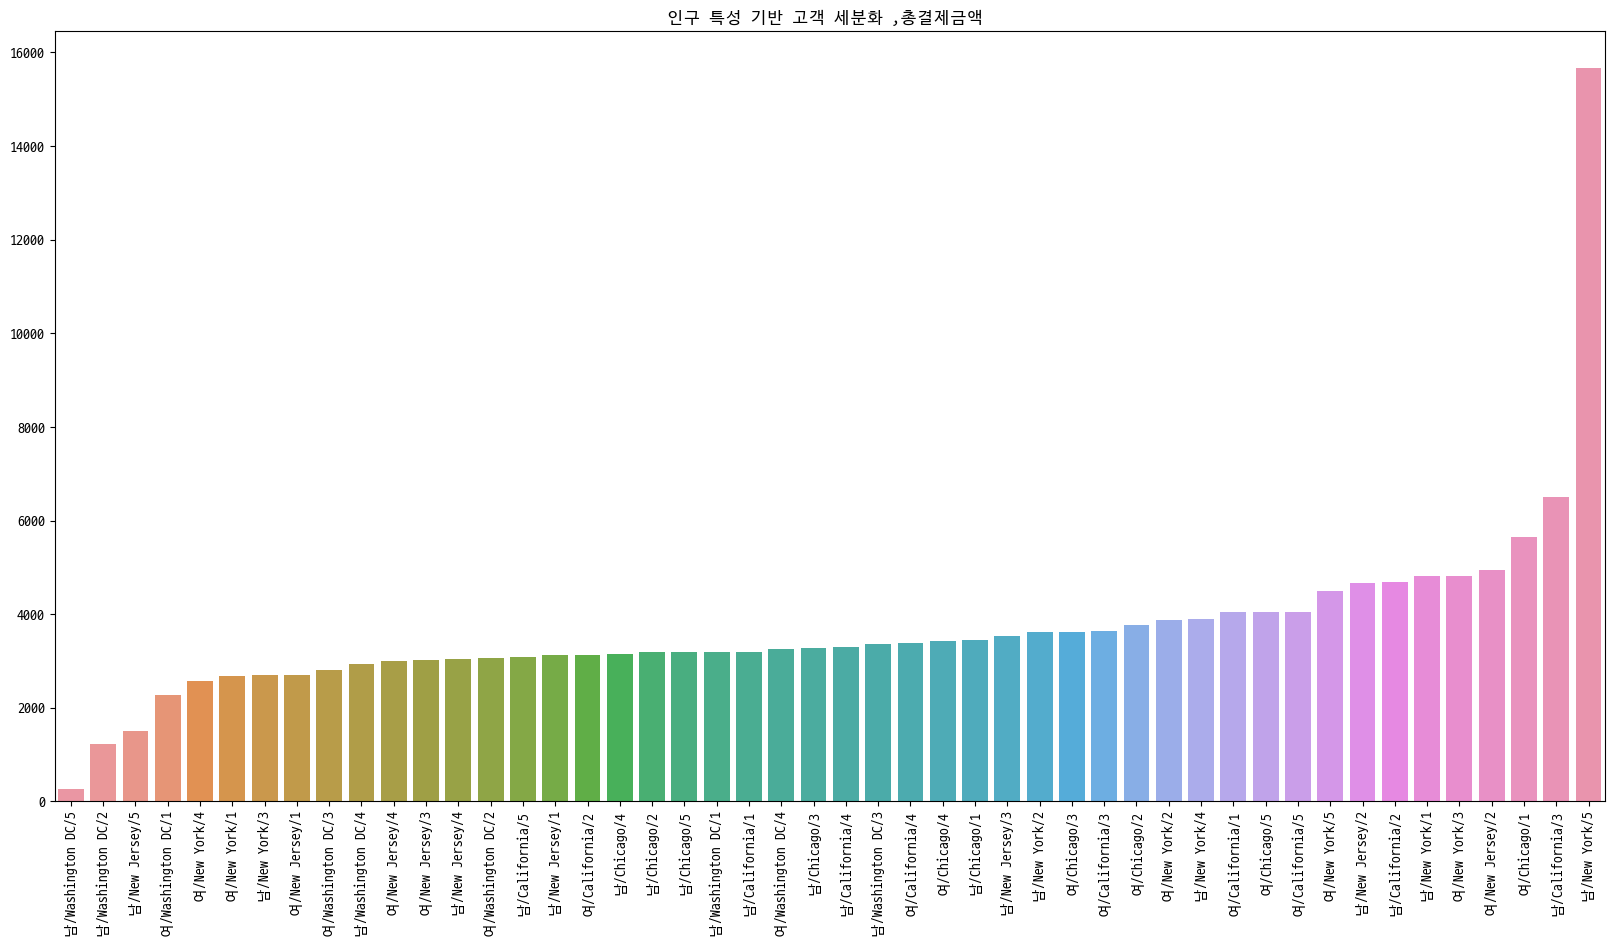

In [16]:
fig = plt.figure(figsize=(20,10))
sns.barplot(data=f_cust,x=final_index,y = final_cust.values)
plt.title('인구 특성 기반 고객 세분화 ,총결제금액 ')
plt.xticks(rotation=90)
plt.show()

### 분석 결과
1. 인구특성기반 세분화를 진행하였을 때 유의미한 패턴이 보이지 않음
2. 각 그룹별 인구수의 비율이 일정하지 않다보니 이상치에 민감

# 4. RFM 세분화 기법
- RFM은 CRM(Customer Relation Management, 고객관계관리)의 한 기법으로서 고객 세분화 작업 시 가장 흔하게 활용되는 **점수부여방식**(Scoring system)의 분석기법이다.

- RFM 기법은 기존 고객의 상위 20%가 기업 매출의 80%를 일으킨다는 **파레토 법칙**을 적용하여 상위 고객에 대해 집중적인 마케팅 활동을 하는 것이 효율적이라는 **고객관계관리(CRM)의 기본 개념**을 근간으로 하고 있다. 

- ***즉 RFM 기법은 채산성 있는 고객만을 마케팅 대상으로 하여 마케팅 효과를 최대화하는 것을 목표로 한다.***

- **Recency** : 얼마나 최근에 구매했는지
- **Frequency** : 얼마나 자주 구매했는지
- **Monetary** : 얼마나 구매했는지

In [17]:
# 원본 데이터셋 복사
rfm_online_sales = df.copy()

# 날짜 형식 변환
rfm_online_sales['거래날짜'] = pd.to_datetime(rfm_online_sales['거래날짜'])

# 데이터 내 마지막 날짜 계산
last_date = rfm_online_sales['거래날짜'].max()

# Recency 계산 - 작을수록 good
## 최근 거래일로 계산
recency_data = rfm_online_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['거래날짜']).dt.days

# Frequency 계산
## 거래 빈도수로 계산
frequency_data = rfm_online_sales.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data.rename(columns={'거래ID': 'Frequency'}, inplace=True)

# Monetary 계산
## 거래금액의 총합으로 계산
rfm_online_sales['SalesValue'] = rfm_online_sales['수량'] * rfm_online_sales['평균금액']
monetary_data = rfm_online_sales.groupby('고객ID')['SalesValue'].sum().reset_index()
monetary_data.rename(columns={'SalesValue': 'Monetary'}, inplace=True)

# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='고객ID').merge(monetary_data, on='고객ID').drop(columns='거래날짜')

# Recency, Frequency, Monetary에 점수 부여
## 4분위수로 등분하여 1~4점 부여
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

# RFM
rfm_data['RFM'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

In [18]:
rfm_data

,고객ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM
0,USER_0000,107,2,30.99,3,1,1,311
1,USER_0001,59,60,13834.90,3,4,4,344
2,USER_0002,73,23,1442.12,3,3,2,332
3,USER_0003,17,17,1360.07,4,2,2,422
4,USER_0004,107,36,1442.47,3,3,2,332
...,...,...,...,...,...,...,...,...
1463,USER_1463,270,7,544.34,1,1,1,111
1464,USER_1464,87,40,2363.05,3,3,3,333
1465,USER_1465,194,8,101.56,2,1,1,211
1466,USER_1466,69,1,298.00,3,1,1,311


## 4-1. K-means Clustering
- 데이터 표준화(Feature Scaling) 필요
- scikit-learn의 elbow method 알고리즘 활용해서 적절한 k값 도출
- k개 그룹별 R,F,M의 기술통계량(평균, 표준편차) 계산
- RFM모형의 가중치를 선택하기 위해 각 그룹에 대한 기술통계량 값을 활용
    - (R, F, M) --> (W1, W2, W3)
        - W1 + W2 + W3 = 1
    - 논문 36페이지 공식 사용

- 산정된 가중치를 토대로 RFM_Score 다시 계산
- 회원등급을 5개 정도로 간소화

In [19]:
### 스케일링할 데이터셋 준비
X = rfm_data[['Recency', 'Frequency', 'Monetary']]
X

,Recency,Frequency,Monetary
0,107,2,30.99
1,59,60,13834.90
2,73,23,1442.12
3,17,17,1360.07
4,107,36,1442.47
...,...,...,...
1463,270,7,544.34
1464,87,40,2363.05
1465,194,8,101.56
1466,69,1,298.00


In [20]:
### 1) 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[2.93956044e-01, 1.44092219e-03, 3.94934982e-04],
       [1.62087912e-01, 8.50144092e-02, 1.82177094e-01],
       [2.00549451e-01, 3.17002882e-02, 1.89779494e-02],
       ...,
       [5.32967033e-01, 1.00864553e-02, 1.32426348e-03],
       [1.89560440e-01, 0.00000000e+00, 3.91116004e-03],
       [2.25274725e-01, 1.45533141e-01, 8.37774431e-02]])

In [21]:
scaled_df = pd.DataFrame(scaled_X,
                         columns=['Recency', 'Frequency', 'Monetary'])
scaled_df

,Recency,Frequency,Monetary
0,0.293956,0.001441,0.000395
1,0.162088,0.085014,0.182177
2,0.200549,0.031700,0.018978
3,0.046703,0.023055,0.017897
4,0.293956,0.050432,0.018983
...,...,...,...
1463,0.741758,0.008646,0.007155
1464,0.239011,0.056196,0.031106
1465,0.532967,0.010086,0.001324
1466,0.189560,0.000000,0.003911


In [22]:
#!pip install yellowbrick

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=0),
                 k=(1, 10))

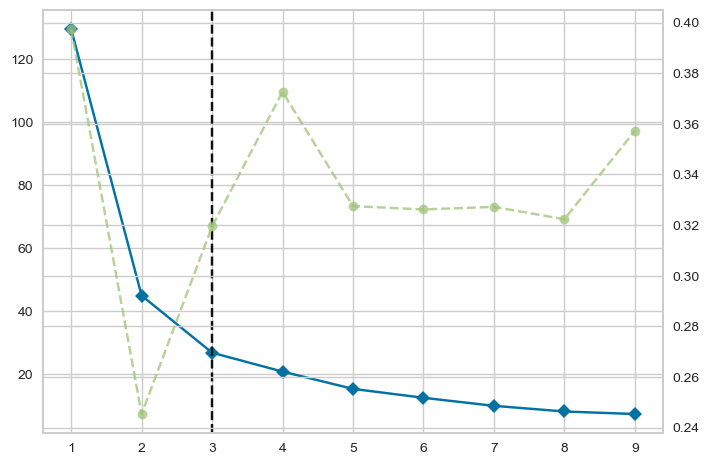

In [23]:
### kmeans 모델링
### elbow method를 사용해 최적의 k값 찾기

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(scaled_X)

### k = 3일 때가 SSE(Sum of Squared Error)가 가장 작아지는 시점

In [24]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 0)

# 정규화된 데이터에 학습
model.fit(scaled_X)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
cluster = model.fit_predict(scaled_X)

In [25]:
set(cluster) # 3개의 클러스터

{0, 1, 2}

In [26]:
kmeans_df = X
kmeans_df['cluster'] = cluster

kmeans_df

,Recency,Frequency,Monetary,cluster
0,107,2,30.99,2
1,59,60,13834.90,0
2,73,23,1442.12,0
3,17,17,1360.07,0
4,107,36,1442.47,2
...,...,...,...,...
1463,270,7,544.34,1
1464,87,40,2363.05,0
1465,194,8,101.56,2
1466,69,1,298.00,0


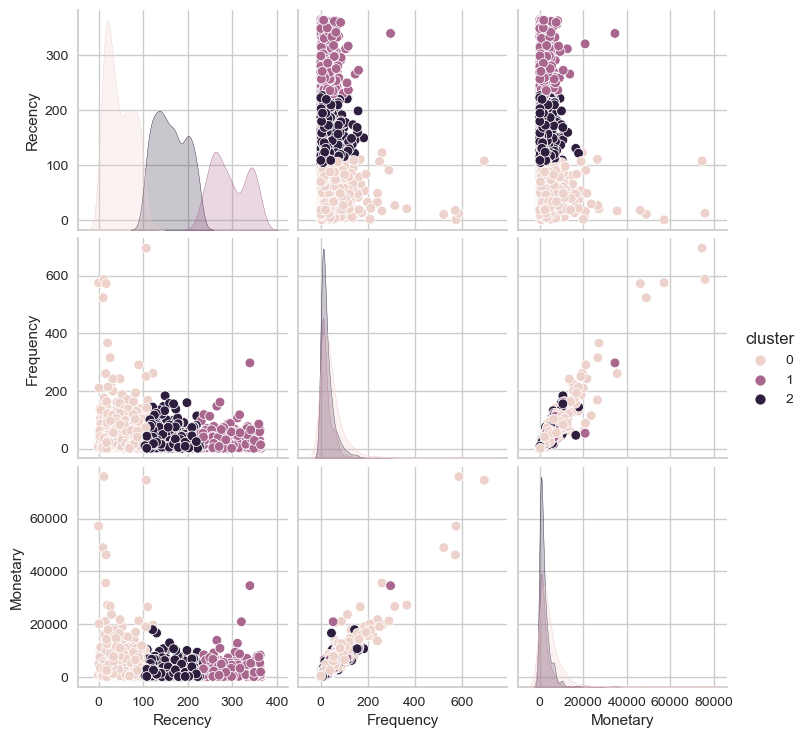

In [27]:
sns.pairplot(kmeans_df, hue="cluster")
plt.show()

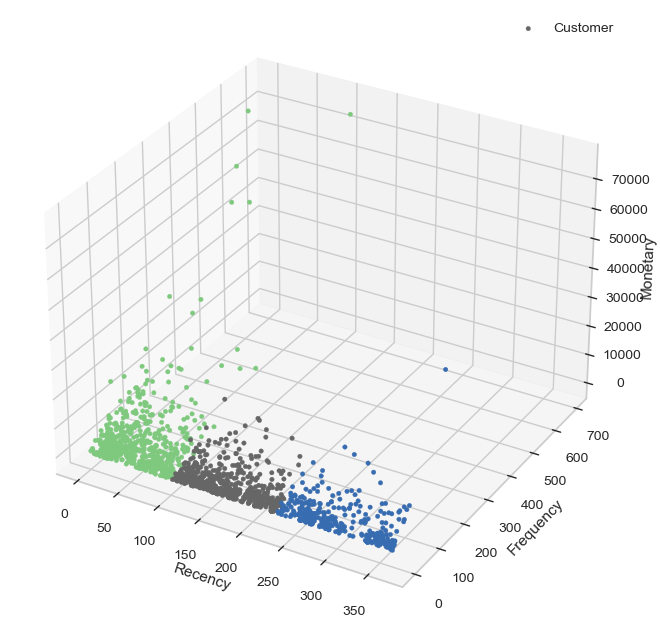

In [28]:
# 3차원 그리기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = kmeans_df

# 3d scatterplot 그리기
ax.scatter(X.iloc[:,0], 
           X.iloc[:,1], 
           X.iloc[:,2],
           c=X['cluster'], #마커컬러
           s=10, #사이즈
           cmap="Accent", #컬러맵
           alpha=1, #투명도
           label='Customer' #범례
          )
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

### 시각화 분석
- Recency는 작을수록, Frequency와 Monetary는 클수록 좋기 때문에,
    - 초록색 클러스터가 채산성이 가장 높은 클러스터라고 볼 수 있고,
    - 파란색 클러스터가 채산성이 가장 낮은 클러스터라고 볼 수 있다.

## 4-2. R,F,M 가중치 구하기
### R,F,M score에 가중치를 부여하게 된 배경
- 가중치가 고려되지 않은 RFM 방법으로 등급을 구분할 경우 
- R, F, M 각각의 점수가 **5점, 4점, 1점인 고객**과 **1점 5점, 4점인 고객**은 같은 등급으로 분류된다

### 가중치 계산법
- 각 군집별 R, F, M 값의 평균 및 표준편차를 이용해 CV(변동계수)를 구하고 그 비율을 활용하여 가중치를 산출하였다.
    - 공식은 아래 사진 참조
- **CV(Coefficient of Variation / 변동계수)**
    - 데이터를 표준화하는 방법 중 하나
    - 데이터의 평균을 1로 만들었을 때의 표준편차를 의미
    - **변동계수를 활용하여 스케일이 다른 데이터들끼리 동일한 선상에서 비교 가능**

In [29]:
cluster_mean = round(kmeans_df.groupby('cluster')[['Recency','Frequency', 'Monetary']].mean(), 2)
cluster_std = round(kmeans_df.groupby('cluster')[['Recency','Frequency', 'Monetary']].std(), 2)

In [30]:
### 각 클러스터별 평균
cluster_mean

,Recency,Frequency,Monetary
cluster,,,
0,46.55,49.44,4752.49
1,294.39,24.42,2138.62
2,161.49,28.00,2033.45


In [31]:
### 각 클러스터별 표준편차
cluster_std

,Recency,Frequency,Monetary
cluster,,,
0,29.74,68.90,6925.01
1,40.47,29.17,3041.47
2,35.41,29.24,2366.49


In [32]:
CV_r0 = cluster_std.iloc[0,0] / cluster_mean.iloc[0,0]
CV_r1 = cluster_std.iloc[1,0] / cluster_mean.iloc[1,0]
CV_r2 = cluster_std.iloc[2,0] / cluster_mean.iloc[2,0]
w1 = min(CV_r0, CV_r1, CV_r2) / (CV_r0 + CV_r1 + CV_r2)
w1

0.13807489484052501

In [33]:
CV_f0 = cluster_std.iloc[0,1] / cluster_mean.iloc[0,1]
CV_f1 = cluster_std.iloc[1,1] / cluster_mean.iloc[1,1]
CV_f2 = cluster_std.iloc[2,1] / cluster_mean.iloc[2,1]
w2 = min(CV_f0, CV_f1, CV_f2) / (CV_f0 + CV_f1 + CV_f2)
w2

0.2874913976216867

In [34]:
CV_m0 = cluster_std.iloc[0,2] / cluster_mean.iloc[0,2]
CV_m1 = cluster_std.iloc[1,2] / cluster_mean.iloc[1,2]
CV_m2 = cluster_std.iloc[2,2] / cluster_mean.iloc[2,2]
w3 = min(CV_m0, CV_m1, CV_m2) / (CV_m0 + CV_m1 + CV_m2)
w3

0.28784520497055005

In [35]:
### 최종 가중치
w_t = w1 + w2 + w3
w1 = round(w1 / w_t, 3)
w2 = round(w2 / w_t, 3)
w3 = round(w3 / w_t, 3)
print(w1+w2+w3)
print(w1,w2,w3)

# (R, F, M) --> (0.2, 0.4, 0.4)의 가중치 부여

1.0
0.194 0.403 0.403


## 4-3. RFM Score 계산
### 25 ~ 100점의 분포 형성(높을수록 충성고객)

In [36]:
rfm_data['RFM_Score'] = (w1 * rfm_data['R_Score'].astype(int) + w2 * rfm_data['F_Score'].astype(int) + w3 * rfm_data['M_Score'].astype(int)) / 4 * 100
rfm_data['RFM_Score'] = round(rfm_data['RFM_Score'], 2)
rfm_data[['RFM_Score']].describe()

,RFM_Score
count,1468.000000
mean,62.197432
std,23.923591
min,25.000000
25%,39.920000
50%,60.080000
75%,85.080000
max,100.000000


In [37]:
RFM_Score = rfm_data.groupby('RFM_Score')[['Recency', 'Frequency', 'Monetary']].mean().sort_values(by='RFM_Score', ascending=False)
RFM_Score
# 49개의 점수분포가 나타났다
## 다이아몬드:1 / 골드:12 / 실버:12 / 브론즈:12 / 일반:12 로 나눔

,Recency,Frequency,Monetary
RFM_Score,,,
100.00,26.141667,114.550000,11471.628000
95.15,89.872093,101.232558,9020.516512
90.30,170.553191,91.063830,6528.942979
89.93,28.322581,36.645161,4782.546452
89.92,33.625000,50.875000,3493.037500
85.45,299.312500,78.229167,7468.258125
85.08,90.828571,48.314286,4507.584571
80.23,170.928571,51.750000,3721.889286
79.85,25.714286,30.761905,2854.517143


In [38]:
# A ~ E등급 부여
## A가 더 높은 등급

A = RFM_Score.iloc[0,]
B = RFM_Score.iloc[1:13,]
C = RFM_Score.iloc[13:25,]
D = RFM_Score.iloc[25:37,]
E = RFM_Score.iloc[37:49,]

E

,Recency,Frequency,Monetary
RFM_Score,,,


## 4-4. 고객 세그먼트 분류 함수
- 기존 10개에서 5개 등급으로 간소화

In [39]:
def classify_customer_segment(row):
    
    if row['RFM_Score'] <= 45.25:
        return '일반'
    elif row['RFM_Score'] <= 60.08:
        return '브론즈'
    elif row['RFM_Score'] <= 75.00:
        return '실버'
    elif row['RFM_Score'] <= 95.20:
        return '골드'
    else:
        return '다이아몬드'
    
# rfm_data에 '고객분류' 컬럼 추가
rfm_data['고객분류'] = rfm_data.apply(classify_customer_segment, axis=1)
rfm_data

,고객ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM,RFM_Score,고객분류
0,USER_0000,107,2,30.99,3,1,1,311,34.70,일반
1,USER_0001,59,60,13834.90,3,4,4,344,95.15,골드
2,USER_0002,73,23,1442.12,3,3,2,332,64.93,실버
3,USER_0003,17,17,1360.07,4,2,2,422,59.70,브론즈
4,USER_0004,107,36,1442.47,3,3,2,332,64.93,실버
...,...,...,...,...,...,...,...,...,...,...
1463,USER_1463,270,7,544.34,1,1,1,111,25.00,일반
1464,USER_1464,87,40,2363.05,3,3,3,333,75.00,실버
1465,USER_1465,194,8,101.56,2,1,1,211,29.85,일반
1466,USER_1466,69,1,298.00,3,1,1,311,34.70,일반


## 4-5. 고객 유형별 시각화
- 골드~일반등급의 분류가 통계적으로 유의한지 검증 필요
    - **ANOVA(분산 분석) 시행**해서 통계적 유의성 검증

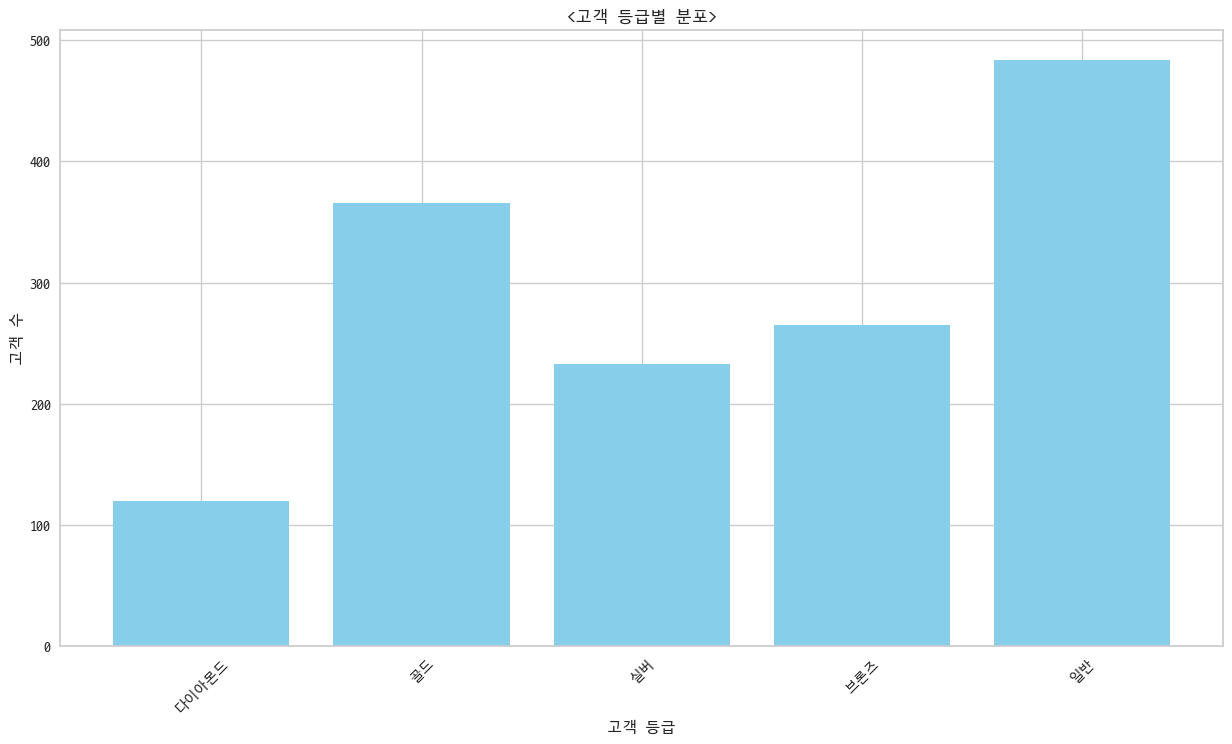

In [40]:
# 가능한 모든 세그먼트 정의
all_segments = ['다이아몬드', '골드', '실버', '브론즈', '일반']

# 각 세그먼트별 고객 수 계산
segment_counts = rfm_data['고객분류'].value_counts()

# 모든 세그먼트에 대한 고객 수를 0으로 초기화하고, 계산된 값으로 업데이트
segment_counts_all = {segment: 0 for segment in all_segments}
segment_counts_all.update(segment_counts)

# 데이터프레임으로 변환
segment_counts_df = pd.DataFrame(list(segment_counts_all.items()), columns=['Segment', 'Count'])

# 세그먼트별 고객 수를 내림차순으로 정렬
segment_counts_sorted_df = segment_counts_df.sort_values(by='Count', ascending=False)

# 바 그래프 시각화
plt.figure(figsize=(15, 8))
plt.rcParams['font.family'] = 'D2Coding'
plt.bar(segment_counts_df['Segment'], segment_counts_df['Count'], color='skyblue')
plt.title('<고객 등급별 분포>')
plt.xlabel('고객 등급')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.show()

## 4-6. R,F,M 컬럼 각각에 대한 ANOVA분석(분산분석) 시행
- 다이아몬드를 제외한 골드~일반까지 네 개의 등급에 대해서만 시행
- **ANOVA분석 시행 이유**:
    - ANOVA 분석(분산분석)은 '세 집단(or 이상)의 평균의 차이가 유의미한가'를 확인하기 위해 사용하는 분석 방법
    - ANOVA 분석은 개체간-분산과 개체내-분산을 이용하여 각 집단별 평균에 대한 유의성을 확인
    - ANOVA 분석은 t-test와 마찬가지로 등분산성, 정규성, 독립성의 조건이 전제되어야 합니다.(만족한다고 가정하에 진행)

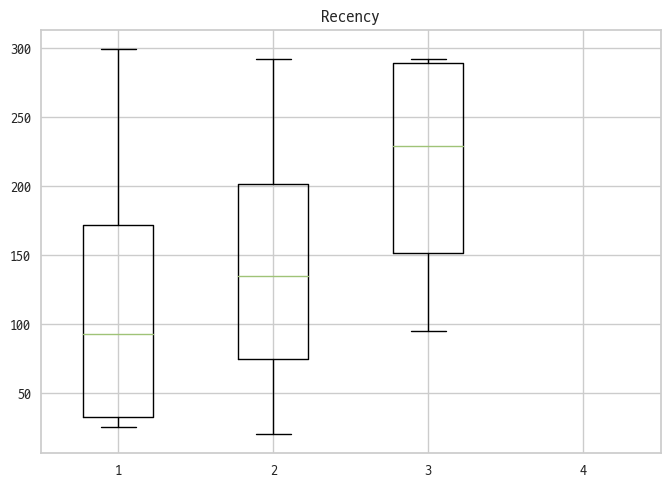

RFM_Score 데이터의 일원분산분석 결과 : F=nan, p=nan




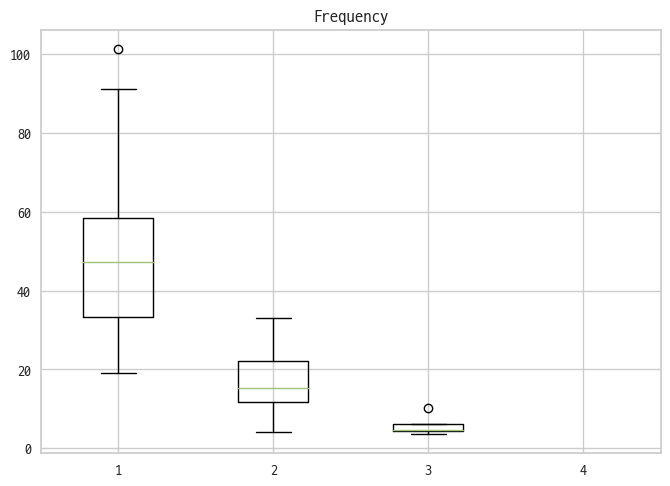

RFM_Score 데이터의 일원분산분석 결과 : F=nan, p=nan




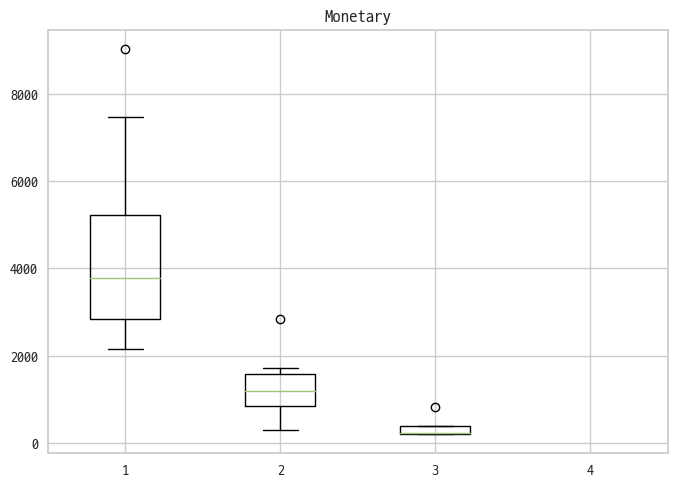

RFM_Score 데이터의 일원분산분석 결과 : F=nan, p=nan




In [41]:
# 그룹별 분포 박스플롯으로 살펴보기
import scipy.stats as stats

for i in range(3):
    plot_data = [B.iloc[:,i],C.iloc[:,i],D.iloc[:,i],E.iloc[:,i]]
    ax = plt.boxplot(plot_data)
    plt.title(B.columns[i])
    plt.show()

    F_statistic, pVal = stats.f_oneway(B.iloc[:,i],C.iloc[:,i],D.iloc[:,i],E.iloc[:,i])
    
    print("RFM_Score 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}".format(F_statistic, pVal))
    if pVal < 0.05:
        print("P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.")
    print()
    print()

### ---------------------------------------- ANOVA분석 시행결과 ----------------------------------------
|   | 그룹 수 | F-value | p-value | 분류의 통계적 유의성 |
|---|-----------|---------|---------|-----------------|
| R | 4         | 1.1     | 0.36444 | 유의하지 않다 |
| F | 4         | 26.5    | 0.00000 | 유의하다 |
| M | 4         | 23.0    | 0.00000 | 유의하다 |

- Recency는 그룹 간의 평균의 차이가 유의미하게 나타나지는 않음
- Frequency와 Monetary는 그룹 간의 차이가 유의미함
    - **그런데 우리는 RFM_Score를 산출할 때 Recency에 가중치를 낮게 줬으므로, 고객 등급의 분류가 어느정도 유의성을 갖는다고 볼 수 있음**

## 4-7. 원본 데이터(df)에 고객분류 JOIN

In [42]:
grade_df = rfm_data[['고객ID', '고객분류']]
grade_df

,고객ID,고객분류
0,USER_0000,일반
1,USER_0001,골드
2,USER_0002,실버
3,USER_0003,브론즈
4,USER_0004,실버
...,...,...
1463,USER_1463,일반
1464,USER_1464,실버
1465,USER_1465,일반
1466,USER_1466,일반


In [43]:
joined_df = df.merge(grade_df, how='inner', on='고객ID')
joined_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,할인율,GST,오프라인비용,온라인비용,총 마케팅비용,요일,할인금액,총결제금액,총결제금액(배송비포함),고객분류
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,...,0.1,0.10,4500,2424.50,6924.50,Tuesday,15.371,152.17290,158.67290,골드
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,1,...,0.1,0.10,4500,2424.50,6924.50,Tuesday,15.371,152.17290,158.67290,골드
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,1,...,0.1,0.10,4500,2424.50,6924.50,Tuesday,0.205,2.02950,8.52950,골드
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,1,...,0.0,0.18,4500,2424.50,6924.50,Tuesday,0.000,103.42700,109.92700,골드
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,1,...,0.1,0.18,4500,2424.50,6924.50,Tuesday,1.650,17.52300,24.02300,골드
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,12,...,0.0,0.10,4000,2058.75,6058.75,Tuesday,0.000,133.43000,139.93000,브론즈
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,12,...,0.3,0.18,4000,2058.75,6058.75,Tuesday,14.676,40.40792,46.90792,브론즈
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,12,...,0.3,0.10,4000,2058.75,6058.75,Tuesday,45.564,116.94760,123.44760,브론즈
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,12,...,0.0,0.10,4000,2058.75,6058.75,Tuesday,0.000,442.86000,449.36000,브론즈


In [44]:
# joined_df.to_csv('joined_df.csv', index=False)

## 4-8. 등급 & 카테고리별 결제금액 top5

In [45]:
grade_category_expenditure = joined_df.groupby(['고객분류', '제품카테고리'])['총결제금액(배송비포함)'].sum()
grade = {'다이아몬드':_, '골드':_, '실버':_, '브론즈':_, '일반':_}
for g in grade.keys():
    grade[g] = grade_category_expenditure[g].sort_values(ascending=False)[:5]
grade

{'다이아몬드': 제품카테고리
 Nest-USA     754517.44410
 Nest         212947.45700
 Apparel      212201.73474
 Office       113443.34480
 Drinkware     81191.19206
 Name: 총결제금액(배송비포함), dtype: float64,
 '골드': 제품카테고리
 Nest-USA     1.258933e+06
 Apparel      3.814557e+05
 Nest         2.116667e+05
 Office       1.725017e+05
 Drinkware    1.212905e+05
 Name: 총결제금액(배송비포함), dtype: float64,
 '실버': 제품카테고리
 Nest-USA     355730.71860
 Apparel      111945.28664
 Nest          58099.46750
 Office        46094.03210
 Drinkware     32751.95280
 Name: 총결제금액(배송비포함), dtype: float64,
 '브론즈': 제품카테고리
 Nest-USA     206323.04120
 Apparel       67215.55204
 Office        31046.09810
 Nest          27759.98205
 Drinkware     22930.85296
 Name: 총결제금액(배송비포함), dtype: float64,
 '일반': 제품카테고리
 Nest-USA     146141.39790
 Apparel       55010.94532
 Office        18860.04650
 Drinkware     14457.44398
 Bags          10600.18188
 Name: 총결제금액(배송비포함), dtype: float64}

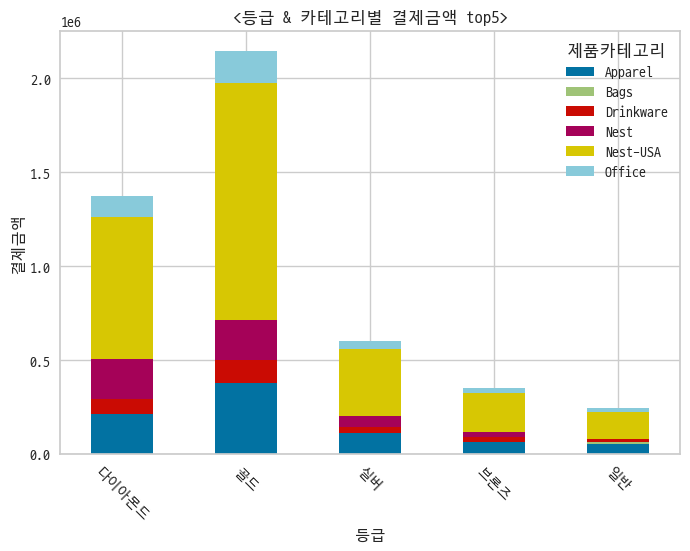

In [46]:
pd.DataFrame(grade).T.plot(kind="bar", 
                           stacked=True,
                           title='<등급 & 카테고리별 결제금액 top5>',
                           xlabel='등급',
                           ylabel='결제금액',
                           rot=-45);

In [47]:
grade_category_expenditure = joined_df.groupby(['고객분류', '제품카테고리'])['수량'].sum()
grade = {'다이아몬드':_, '골드':_, '실버':_, '브론즈':_, '일반':_}
for g in grade.keys():
    grade[g] = grade_category_expenditure[g].sort_values(ascending=False)[:5]
grade

{'다이아몬드': 제품카테고리
 Office       24814
 Drinkware     9105
 Apparel       8204
 Lifestyle     6085
 Nest-USA      5993
 Name: 수량, dtype: int64,
 '골드': 제품카테고리
 Office       40853
 Apparel      15339
 Drinkware    13388
 Lifestyle    11773
 Nest-USA      9877
 Name: 수량, dtype: int64,
 '실버': 제품카테고리
 Office       10439
 Apparel       3966
 Drinkware     3524
 Nest-USA      2806
 Lifestyle     2634
 Name: 수량, dtype: int64,
 '브론즈': 제품카테고리
 Office       7889
 Drinkware    2838
 Apparel      2831
 Lifestyle    2253
 Nest-USA     1636
 Name: 수량, dtype: int64,
 '일반': 제품카테고리
 Office       4388
 Lifestyle    2136
 Apparel      2098
 Drinkware    1646
 Nest-USA     1118
 Name: 수량, dtype: int64}

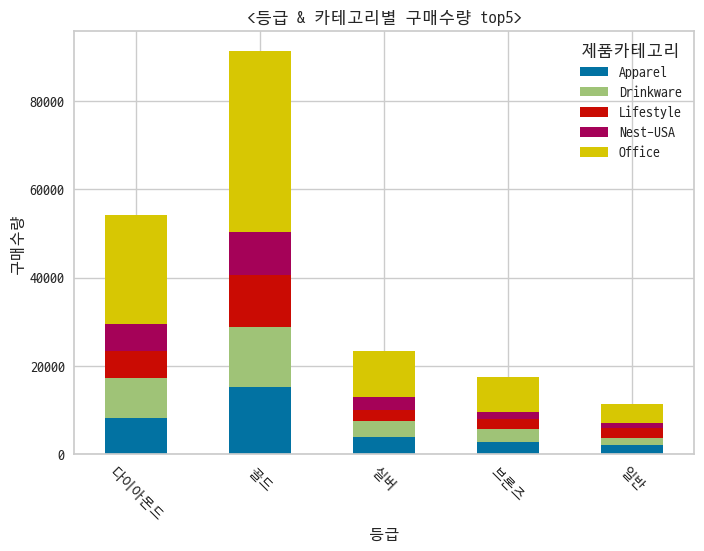

In [48]:
# plt.rcParams['font.family'] = 'D2Coding'

pd.DataFrame(grade).T.plot(kind="bar", 
                           stacked=True,
                          title='<등급 & 카테고리별 구매수량 top5>',
                          xlabel='등급',
                          ylabel='구매수량',
                          rot=-45);

In [49]:
dia_gold = rfm_data[rfm_data['고객분류'].isin(['다이아몬드', '골드'])]

total_rev = joined_df['총결제금액(배송비포함)'].sum()
dia_gold_rev = joined_df[joined_df['고객분류'].isin(['다이아몬드','골드'])]['총결제금액(배송비포함)'].sum()


print(f'다이아몬드, 골드등급 고객수: {len(dia_gold)}명 (전체의 {round(len(dia_gold)/1468, 2)}%)') ## 486명
print(f'총 결제금액에서 차지하는 비중: {round(dia_gold_rev / total_rev, 2)*100}%')

다이아몬드, 골드등급 고객수: 486명 (전체의 0.33%)
총 결제금액에서 차지하는 비중: 75.0%


### 분석 내용
1. 일반등급은 고객수가 가장 많지만 결제금액이 차지하는 비율이 매우 낮으므로, 타켓팅 대상에서 제외하는 쪽으로
2. 다이아몬드+골드등급(468명)이 총 결제금액에서 차지하는 비중이 약 75%에 달하므로, 이 쪽 고객들을 타겟팅하는 방향
    - ***RFM 기법은 채산성 있는 고객만을 마케팅 대상으로 하여 마케팅 효과를 극대화하는 것을 목표로 함***
3. 고객분류&카테고리별 결제금액 top5를 보면 **Nest-USA, Nest, Apparel, Office, Drinkware**가 높게 형성되어있지만,
    - 고객분류&카테고리별 구매수량 top5의 경우에는 **Office, Apparel, Drinkware, Lifestyle, Nest-USA**가 높게 형성되어있다.
    - 이는 Nest-USA 제품의 가격대가 높아서 나타나는 현상이므로, **우리의 목적인 구매경향 파악을 위해서는 고객분류&카테고리별 구매수량을 살펴보는 것이 더 적합하다고 판단된다.**
4. **시장바구니 분석**을 통해 연관성이 높은 제품군을 묶어 함께 구매할 확률이 높은 제품을 추천하는 방식 채택

# 5. 시장바구니 분석(Market Basket Analysis)
- 어떤 물건들이 함께 팔려나가는지, 어떤 것이 촉진될 여지가 있는지를 알려주므로 상품에 대한 통찰력을 준다
- 월마트 사례
    - 기저귀와 맥주를 동시에 구매하는 경향이 있다는 것을 파악
    - 이렇듯 전혀 상관 없어보이는 두 상품 간 연관성을 수치로 제시해줌

1. **지지도(Support)**
- 전체 거래항목 중 상품 A와 상품 B를 동시에 포함하여 거래하는 비율을 의미
    - A -> B 라고 하는 규칙이 전체 거래 중 차지하는 비율을 통해 해당 연관 규칙이 얼마나 의미가 있는 규칙인지를 확인
    - 지지도 = P(A∩B)  :  A와 B가 동시에 포함된 거래 수 / 전체 거래 수
  
2. **신뢰도(Confidence)**
- 상품 A를 포함하는 거래 중 A와 B가 동시에 거래되는 비중
    - 상품 A를 구매 했을 때 상품 B를 구매할 확률이 어느정도 되는지를 확인
    - 신뢰도 =  P(A∩B) / P(A)  :  A와 B가 동시에 포함된 거래 수 / A가 포함된 거래 수

3. **향상도(Lift)**
- 상품 A의 거래 중 항목 B가 포함된 거래의 비율 / 전체 상품 거래 중 상품 B가 거래된 비율
    - A가 주어지지 않았을 때 B의 확률 대비 A가 주어졌을 때 B의 확률 증가 비율
    - 향상도 = P(A∩B) / P(A)*P(B)  = P (B|A) / P (B):  A와 B가 동시에 일어난 횟수 / A, B가 독립된 사건일 때 A,B가 동시에 일어날 확률
    - 품목 A와 B사이에 아무런 관계가 상호 관계가 없으면 향상도는 1이고, 향상도가 1보다 높아질 수록 연관성이 높다고 할 수 있다.
    - 향상도가 1보다 크거나 작다면 우연적 기회(random chance)보다 우수하다고도 해석함.

In [50]:
# pip install mlxtend

In [51]:
from mlxtend.frequent_patterns import apriori,association_rules

In [52]:
df = joined_df

In [53]:
A = df[df['고객분류']=='다이아몬드']
B = df[df['고객분류']=='골드']
C = df[df['고객분류']=='실버']
D = df[df['고객분류']=='브론즈']
E = df[df['고객분류']=='일반']
E

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,월,...,할인율,GST,오프라인비용,온라인비용,총 마케팅비용,요일,할인금액,총결제금액,총결제금액(배송비포함),고객분류
383,USER_0345,Transaction_0013,2019-01-01,Product_0971,Lifestyle,1,1.24,6.50,Clicked,1,...,0.0,0.18,4500,2424.50,6924.50,Tuesday,0.000,1.46320,7.96320,일반
384,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Clicked,1,...,0.0,0.10,4500,2424.50,6924.50,Tuesday,0.000,169.08100,175.58100,일반
385,USER_0683,Transaction_5384,2019-03-26,Product_0983,Nest-USA,1,119.00,6.50,Clicked,3,...,0.0,0.10,2000,1672.79,3672.79,Tuesday,0.000,130.90000,137.40000,일반
386,USER_0683,Transaction_5689,2019-03-30,Product_0880,Drinkware,5,2.39,12.48,Clicked,3,...,0.0,0.18,2000,692.02,2692.02,Saturday,0.000,14.10100,26.58100,일반
387,USER_0683,Transaction_10783,2019-06-19,Product_0981,Nest-USA,5,149.00,12.91,Used,6,...,0.3,0.10,3500,2617.14,6117.14,Wednesday,223.500,573.65000,586.56000,일반
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52885,USER_0513,Transaction_25015,2019-12-30,Product_0904,Office,4,3.05,6.00,Used,12,...,0.3,0.10,4000,674.31,4674.31,Monday,3.660,9.39400,15.39400,일반
52886,USER_0513,Transaction_25015,2019-12-30,Product_0942,Office,10,2.55,6.00,Not Used,12,...,0.0,0.10,4000,674.31,4674.31,Monday,0.000,28.05000,34.05000,일반
52887,USER_0513,Transaction_25016,2019-12-31,Product_0983,Nest-USA,1,121.30,6.50,Used,12,...,0.3,0.10,4000,2058.75,6058.75,Tuesday,36.390,93.40100,99.90100,일반
52888,USER_0513,Transaction_25017,2019-12-31,Product_0984,Nest-USA,3,80.52,6.50,Clicked,12,...,0.0,0.10,4000,2058.75,6058.75,Tuesday,0.000,265.71600,272.21600,일반


In [54]:
basket_A = pd.pivot_table(A,index='거래ID',columns='제품카테고리',
                          values='수량',aggfunc='sum',fill_value=0)
basket_B = pd.pivot_table(B,index='거래ID',columns='제품카테고리',
                          values='수량',aggfunc='sum',fill_value=0)
basket_C = pd.pivot_table(C,index='거래ID',columns='제품카테고리',
                          values='수량',aggfunc='sum',fill_value=0)
basket_D = pd.pivot_table(D,index='거래ID',columns='제품카테고리',
                          values='수량',aggfunc='sum',fill_value=0)
basket_E = pd.pivot_table(E,index='거래ID',columns='제품카테고리',
                          values='수량',aggfunc='sum',fill_value=0)
basket_A

제품카테고리,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
거래ID,,,,,,,,,,,,,,,,,,,,
Transaction_0038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0041,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
Transaction_0042,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transaction_9992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Transaction_9993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0
Transaction_9994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
def encoding(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

basket_A = basket_A.applymap(encoding)
basket_B = basket_B.applymap(encoding)
basket_C = basket_C.applymap(encoding)
basket_D = basket_D.applymap(encoding)
basket_E = basket_E.applymap(encoding)

basket_A

제품카테고리,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
거래ID,,,,,,,,,,,,,,,,,,,,
Transaction_0038,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_0041,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Transaction_0042,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transaction_9992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_9993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Transaction_9994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
freq_item_A = apriori(basket_A,min_support = 0.01, use_colnames=True)
freq_item_B = apriori(basket_B,min_support = 0.01, use_colnames=True)
freq_item_C = apriori(basket_C,min_support = 0.01, use_colnames=True)
freq_item_D = apriori(basket_D,min_support = 0.01, use_colnames=True)
freq_item_E = apriori(basket_E,min_support = 0.01, use_colnames=True)

C:\Users\yoons\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\yoons\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\yoons\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\yoons\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types re

In [57]:
rules_A = association_rules(freq_item_A, metric = "confidence", min_threshold = 0.03).iloc[:,[0,1,4,5,6]]
rules_A.sort_values('confidence', ascending = False, ignore_index=True, inplace = True)
rules_B = association_rules(freq_item_B, metric = "confidence", min_threshold = 0.03).iloc[:,[0,1,4,5,6]]
rules_B.sort_values('confidence', ascending = False, ignore_index=True, inplace = True)
rules_C = association_rules(freq_item_C, metric = "confidence", min_threshold = 0.03).iloc[:,[0,1,4,5,6]]
rules_C.sort_values('confidence', ascending = False, ignore_index=True, inplace = True)
rules_D = association_rules(freq_item_D, metric = "confidence", min_threshold = 0.03).iloc[:,[0,1,4,5,6]]
rules_D.sort_values('confidence', ascending = False, ignore_index=True, inplace = True)
rules_E = association_rules(freq_item_E, metric = "confidence", min_threshold = 0.03).iloc[:,[0,1,4,5,6]]
rules_E.sort_values('confidence', ascending = False, ignore_index=True, inplace = True)

## 다이아등급

In [58]:
rules_A.head(5)

,antecedents,consequents,support,confidence,lift
0,"(Lifestyle, Drinkware)",(Office),0.014489,0.668874,5.068176
1,(Headgear),(Apparel),0.014632,0.629630,2.045269
2,"(Bags, Drinkware)",(Office),0.010185,0.586777,4.446110
3,(Notebooks & Journals),(Office),0.011333,0.537415,4.072087
4,"(Lifestyle, Drinkware)",(Apparel),0.010759,0.496689,1.613428


## 골드등급

In [59]:
rules_B.head(5)

,antecedents,consequents,support,confidence,lift
0,"(Bags, Drinkware)",(Office),0.013601,0.633858,4.476719
1,(Headgear),(Apparel),0.017234,0.620061,1.916861
2,"(Lifestyle, Drinkware)",(Office),0.015376,0.588997,4.159878
3,"(Office, Bags)",(Drinkware),0.013601,0.542088,5.325054
4,(Notebooks & Journals),(Office),0.013517,0.522876,3.692888


## 실버등급

In [60]:
rules_C.head()

,antecedents,consequents,support,confidence,lift
0,(Notebooks & Journals),(Office),0.013865,0.615385,4.252418
1,"(Lifestyle, Drinkware)",(Office),0.011843,0.602941,4.166432
2,"(Bags, Drinkware)",(Office),0.011843,0.585714,4.047391
3,"(Lifestyle, Drinkware)",(Apparel),0.010399,0.529412,1.589613
4,"(Office, Bags)",(Drinkware),0.011843,0.506173,5.199912


## 5-1. 분석 내용
- notebooks & journals를 구매할 때 Office 제품도 함께 구매
- Headgear를 구매할 때 Apparel 제품도 함께 구매
- (Lifestyle, Drinkware)를 구매할 때 Office 제품도 함께 구매
- (Bags, Drinkware)를 구매할 때 Office 제품도 함께 구매
- (Lifestyle, Drinkware)를 구매할 때 Apparel 제품도 함께 구매

## 5-2. 일반/브론즈등급 회원은 진짜 버려도 되는가?
- 마케팅 비용 추이와 일반등급 회원의 결제액 비교하여 판단
    - **상관계수** 활용

### 8:2 법칙?
- **상위 20%의 소비자가 전체 매출의 80%를 담당한다는 가설**
- 우리 데이터셋은 8:2까지는 아니지만, 7:3 정도는 만족한다
- 상위 30%의 고객(다이아, 골드)을 타겟팅하고 채산성이 낮은 고객(일반)은 마케팅 대상에서 제외한다

In [61]:
rfm_sorted = rfm_data.sort_values(by='Monetary', ascending=False, ignore_index=True)
total_monetary = rfm_sorted['Monetary'].sum()
rfm_sorted['Monetary_proportion'] = rfm_sorted['Monetary'] / total_monetary
print(f"상위 30%의 고객들이 총 결제금액의 {round(rfm_sorted[:440]['Monetary_proportion'].sum(), 2)*100}%를 차지합니다.")


상위 30%의 고객들이 총 결제금액의 73.0%를 차지합니다.


In [62]:
normal_df = joined_df[joined_df['고객분류']=='일반']

marketing['거래날짜'] = pd.to_datetime(marketing['거래날짜'])
marketing['총비용'] = marketing['오프라인비용'] + marketing['온라인비용']

monthly_marketing = marketing.groupby(marketing['거래날짜'].dt.month)['총비용'].mean()

monthly_normal_rev = normal_df.groupby('월')['총결제금액(배송비포함)'].sum()
monthly_diagold_rev = joined_df[joined_df['고객분류'].isin(['다이아몬드','골드'])].groupby('월')['총결제금액(배송비포함)'].sum()

df = pd.DataFrame({'마케팅비용':monthly_marketing, 
                   '일반등급_총결제금액':monthly_normal_rev,
                  '다이아_골드등급_총결제금액': monthly_diagold_rev})
df

,마케팅비용,일반등급_총결제금액,다이아_골드등급_총결제금액
1,4997.708065,59284.38978,339729.62118
2,4896.711429,8672.14436,325395.76238
3,3943.551290,44114.30667,293471.91271
4,5234.227667,44619.78477,342667.26463
5,3814.827097,18862.62800,268977.50890
6,4477.271333,19509.78420,219572.78539
7,3877.995161,17969.34687,372871.04204
8,4609.811290,24307.34732,313301.61382
9,4517.151333,13905.79051,300798.38193
10,4878.214516,18926.10890,331483.12701


In [63]:
round(df.corr(), 2)

,마케팅비용,일반등급_총결제금액,다이아_골드등급_총결제금액
마케팅비용,1.00,-0.19,0.68
일반등급_총결제금액,-0.19,1.00,-0.30
다이아_골드등급_총결제금액,0.68,-0.30,1.00


### 분석결과
- 월별 마케팅 비용, 월별 일반등급_총결제금액, 월별 다이아골드등급_총결제금액
- 위 세 데이터간 상관계수를 살펴본 결과,
    - 마케팅비용과 일반등급 고객들의 총결제금액 사이에는 약 -0.2의 음의 상관관계가 있고,
    - 마케팅비용과 골드다이아등급 고객들의 총결제금액 사이에는 약 0.68의 양의 상관관계가 있음을 발견
- **따라서, 일반등급 고객들은 마케팅 대상에서 제외하여 비용을 절감하는 방향이 좋을 듯**

# 6. 코호트분석(Cohort)

##  Cohort 분석에 사용할 DataFrame, 함수

### DataFrame (df_c)

In [64]:
from ipypb import ipb
import datetime as dt

In [65]:
df= joined_df

In [66]:
df.to_csv('data/dfdfdf.csv', index=False)

In [67]:
df_c = df.copy()
df_c['거래날짜'] = pd.to_datetime(df_c['거래날짜'])
df_c['거래년월']=df_c['거래날짜'].dt.strftime('%Y.%m')
df_c = df_c[['고객ID','총결제금액','거래날짜','거래년월','성별']]
d = df_c.groupby('고객ID')['거래년월'].min().reset_index().rename(columns = {'거래년월':'FirstOrder'})
df_c = pd.merge(df_c, d, on='고객ID')
df_c = pd.merge(df_c, df[['고객ID','고객분류']].drop_duplicates(), on='고객ID')
df_c

,고객ID,총결제금액,거래날짜,거래년월,성별,FirstOrder,고객분류
0,USER_1358,152.17290,2019-01-01,2019.01,남,2019.01,골드
1,USER_1358,152.17290,2019-01-01,2019.01,남,2019.01,골드
2,USER_1358,2.02950,2019-01-01,2019.01,남,2019.01,골드
3,USER_1358,103.42700,2019-01-01,2019.01,남,2019.01,골드
4,USER_1358,17.52300,2019-01-01,2019.01,남,2019.01,골드
...,...,...,...,...,...,...,...
52919,USER_0504,133.43000,2019-12-31,2019.12,여,2019.12,브론즈
52920,USER_0504,40.40792,2019-12-31,2019.12,여,2019.12,브론즈
52921,USER_0504,116.94760,2019-12-31,2019.12,여,2019.12,브론즈
52922,USER_0562,442.86000,2019-12-31,2019.12,여,2019.12,브론즈


### Cohort 생성 함수

In [68]:
def create_cohort(df):

    ### 거래주기별 고객수, 거래금액 ###
    df1 = df.groupby(['FirstOrder','거래년월'])['고객ID'].nunique().reset_index().rename(columns = {'고객ID':'총고객수'})
    df2 = df.groupby(['FirstOrder','거래년월'])['총결제금액'].sum().reset_index().rename(columns={'총결제금액':'총금액'})
    d = df.groupby(['고객ID', 'FirstOrder', '거래년월']).size().reset_index(name='거래횟수')
    d3 = d.groupby(['FirstOrder', '거래년월'])['거래횟수'].sum().reset_index(name='총거래수')
    cohort = pd.merge(df1,df2)
    cohort = pd.merge(cohort,d3)

    ### Cohort 기간 계산 (거래월 - 최초거래월)
    temp = []

    for i in ipb(range(cohort.shape[0])):
        f_first_order = pd.to_datetime(cohort.FirstOrder[i]).to_period('M')
        f_order_cycle = pd.to_datetime(cohort['거래년월'][i]).to_period('M')

        month_diff = (f_order_cycle - f_first_order).n

        temp.append(month_diff)
    cohort['CohortPeriod'] = temp

    return cohort

### Cohort별 재구매율(repurchase_rate) 계산 함수

In [69]:
def create_repurchase_rate(cohort):
    repurchase_rate = cohort.set_index(['FirstOrder', 'CohortPeriod'])
    repurchase_rate = repurchase_rate['총고객수'].unstack(1)
    repurchase_rate = repurchase_rate.div(repurchase_rate[0],axis = 0)
    return repurchase_rate

### Cohort별 재구매금액(repurchase_sum) 계산 함수

In [70]:
def create_repurchase_sum(cohort):
    repurchase_sum = cohort.set_index(['FirstOrder', 'CohortPeriod'])
    repurchase_sum = repurchase_sum['총금액'].unstack(1)
    return repurchase_sum

### Cohort별 재구매량(repurchase_count) 계산 함수

In [71]:
def create_repurchase_count(cohort):
    repurchase_count = cohort.set_index(['FirstOrder', 'CohortPeriod'])
    repurchase_count = repurchase_count['총거래수'].unstack(1)
    return repurchase_count

## 분석

### Cohort df

In [72]:
# 전체 고객
cohort = create_cohort(df_c)

# 다이아몬드&골드 고객
df_c_dg = df_c.loc[(df_c['고객분류']=='다이아몬드')|(df_c['고객분류']=='골드')]
cohort_dg = create_cohort(df_c_dg)

 [████████████████████████████████████████████████████████████] 78/78 [00:00<00:00, 0.00s/it]

 [████████████████████████████████████████████████████████████] 78/78 [00:00<00:00, 0.00s/it]

In [73]:
cohort.head()

,FirstOrder,거래년월,총고객수,총금액,총거래수,CohortPeriod
0,2019.01,2019.01,215,434848.22875,4063,0
1,2019.01,2019.02,13,40483.20322,437,1
2,2019.01,2019.03,24,47320.33012,620,2
3,2019.01,2019.04,34,124526.43909,768,3
4,2019.01,2019.05,23,30523.18904,450,4


In [74]:
cohort_dg.head()

,FirstOrder,거래년월,총고객수,총금액,총거래수,CohortPeriod
0,2019.01,2019.01,84,297906.34118,2753,0
1,2019.01,2019.02,10,37191.81858,387,1
2,2019.01,2019.03,18,45981.73170,597,2
3,2019.01,2019.04,21,121498.04807,708,3
4,2019.01,2019.05,17,26862.59650,381,4


### 재거래율

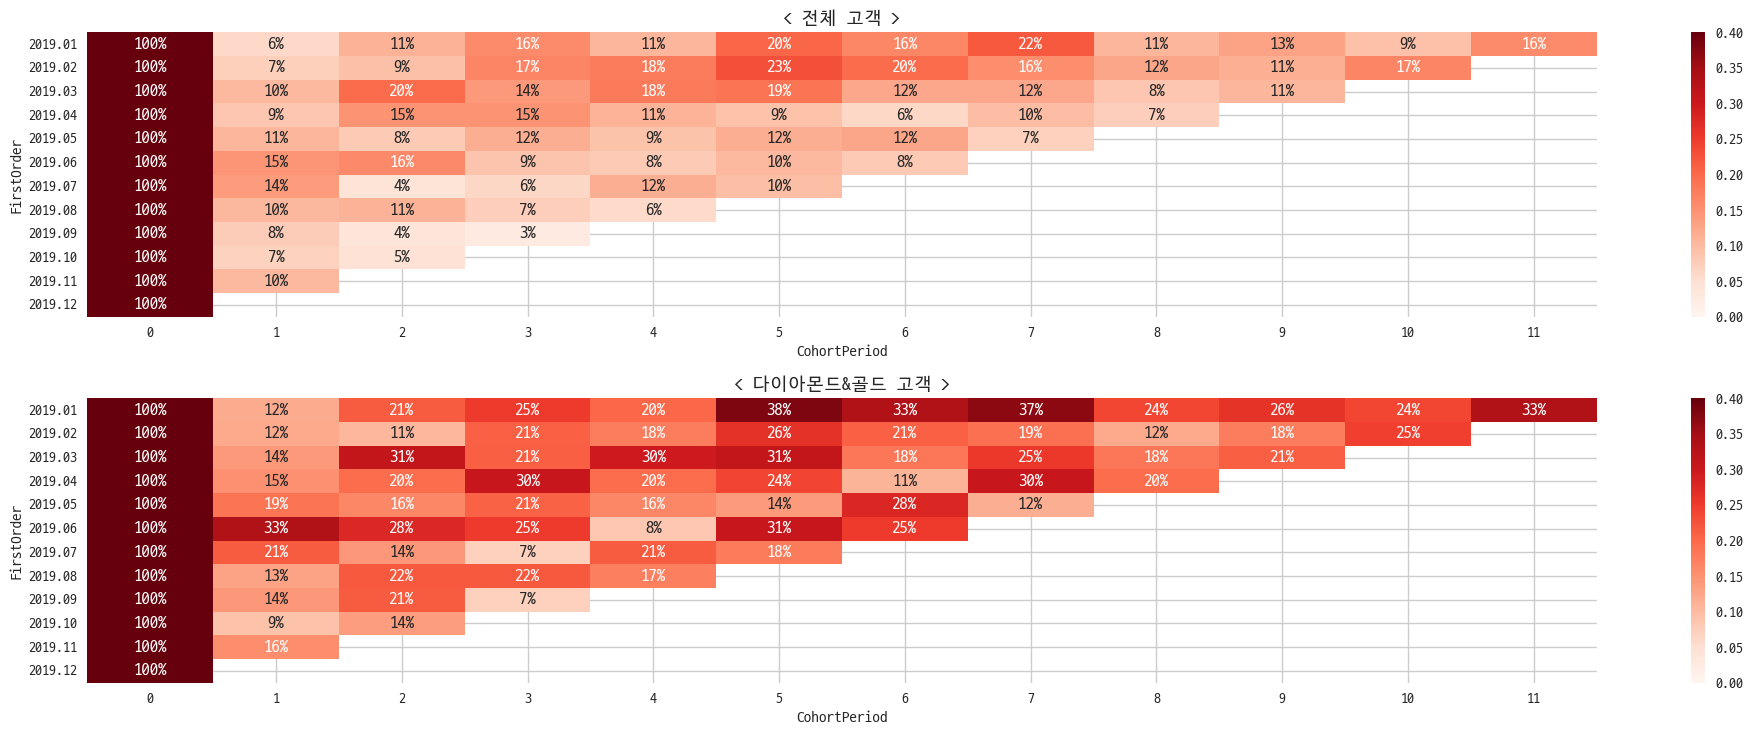

In [75]:
repurchase_rate = create_repurchase_rate(cohort)
repurchase_rate_dg = create_repurchase_rate(cohort_dg)

fig, ax = plt.subplots(2,1, figsize=(20,7.5))

ax[0].set_title('< 전체 고객 >', fontsize=13)
_=sns.heatmap(repurchase_rate, annot = True, fmt = '.0%', ax=ax[0],cmap='Reds', vmin=0, vmax=0.40)

ax[1].set_title('< 다이아몬드&골드 고객 >', fontsize=13)
_=sns.heatmap(repurchase_rate_dg, annot = True, fmt = '.0%', ax=ax[1],cmap='Reds', vmin=0, vmax=0.40)

plt.tight_layout()

> 일반고객의 경우 9월, 10월에 최초 거래한 고객들의 재구매율이 낮음.
<br><br>
> 다이아몬드 고객의 경우 10월에 최초 거래한 고객들의 재구매율이 낮음.
<br><br>
> 아래와 같이 연말은 매출이 증가하는 시기임으로 해당 고객들의 재거래율을 높이면 매출에 시너지 효과

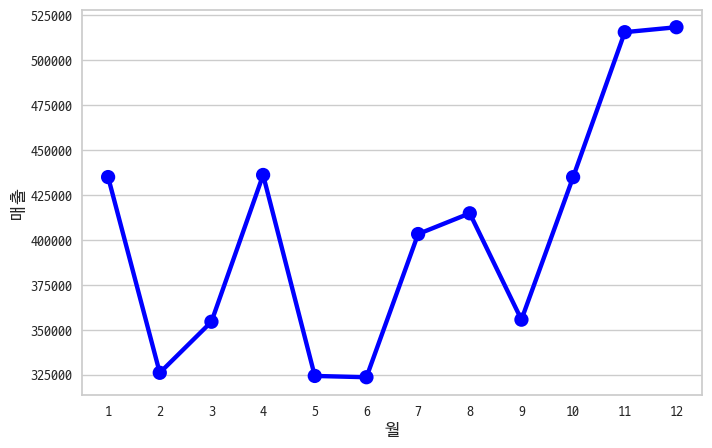

In [76]:
fig, ax = plt.subplots(figsize=(8,5))

_=sns.pointplot(x='월', y='총결제금액', data=df, estimator=np.sum, errorbar = None, color='Blue')
_=ax.set_xlabel('월', fontsize=12)
_=ax.set_ylabel('매출', fontsize=12)

### 재거래금액

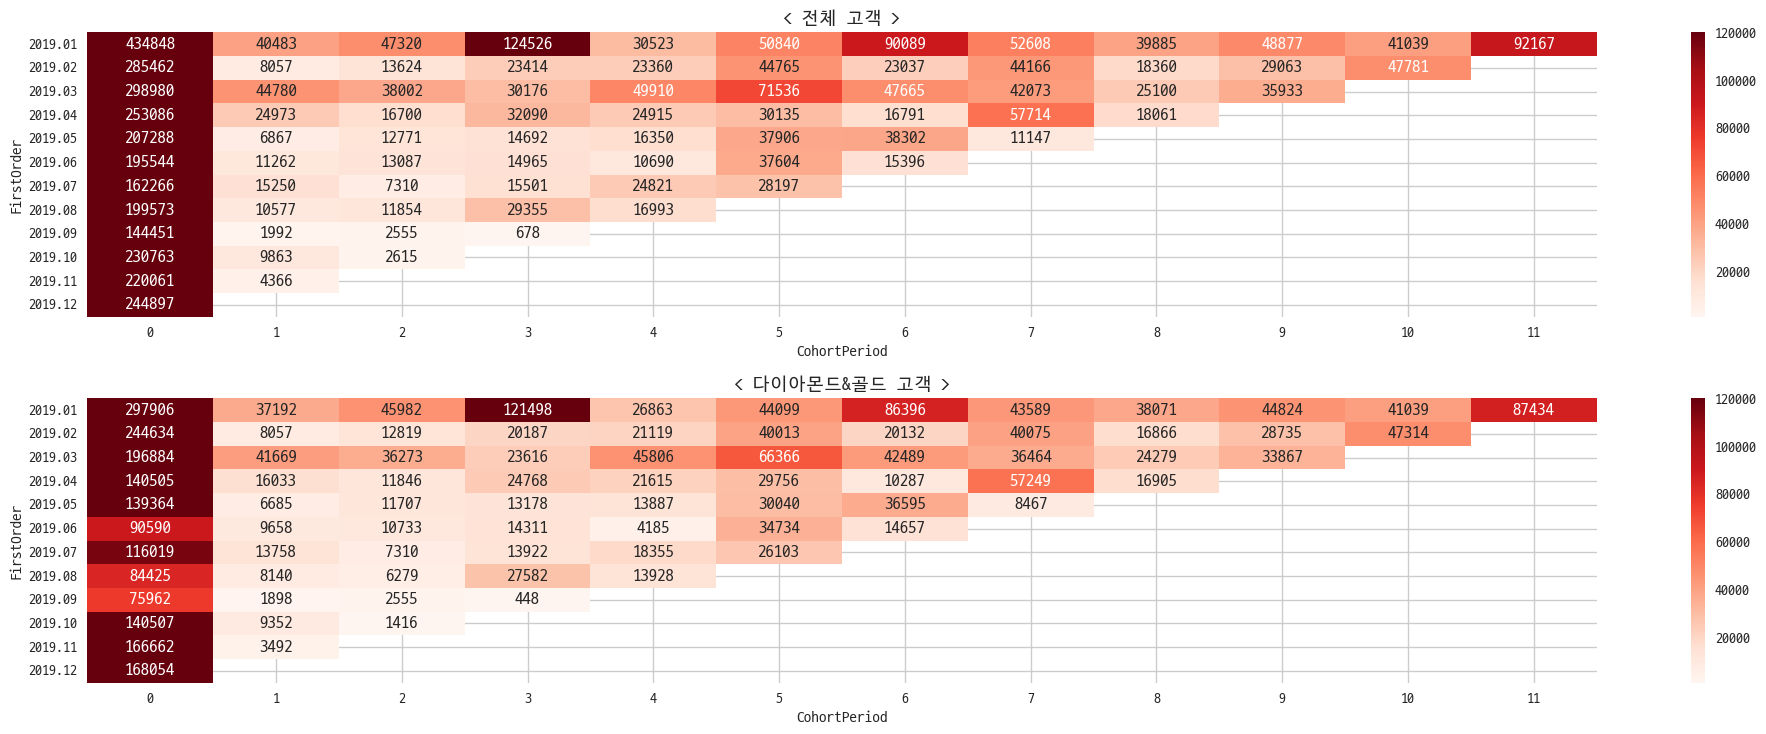

In [77]:
repurchase_sum = create_repurchase_sum(cohort)
repurchase_sum_dg = create_repurchase_sum(cohort_dg)

fig, ax = plt.subplots(2,1, figsize=(20,7.5))

ax[0].set_title('< 전체 고객 >', fontsize=13)
_=sns.heatmap(repurchase_sum, annot = True, fmt = '.0f', ax=ax[0],cmap='Reds',vmin=1000, vmax=120000)

ax[1].set_title('< 다이아몬드&골드 고객 >', fontsize=13)
_=sns.heatmap(repurchase_sum_dg, annot = True, fmt = '.0f', ax=ax[1],cmap='Reds', vmin=1000, vmax=120000)

plt.tight_layout()

### 재거래횟수

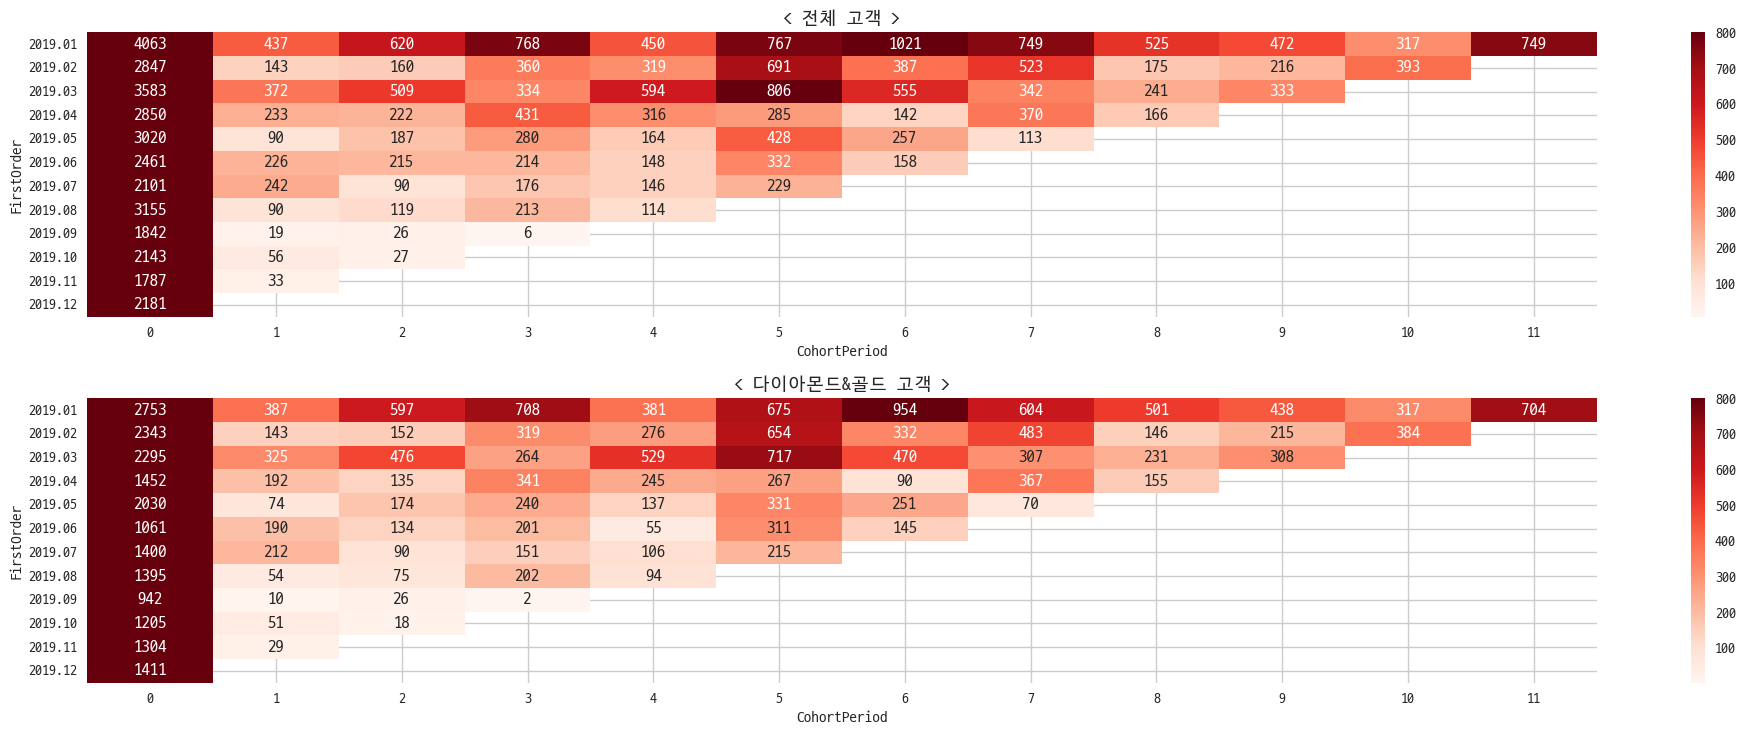

In [78]:
repurchase_count = create_repurchase_count(cohort)
repurchase_count_dg = create_repurchase_count(cohort_dg)

fig, ax = plt.subplots(2,1, figsize=(20,7.5))

ax[0].set_title('< 전체 고객 >', fontsize=13)
_=sns.heatmap(repurchase_count, annot = True, fmt = '.0f', ax=ax[0],cmap='Reds', vmax=800)

ax[1].set_title('< 다이아몬드&골드 고객 >', fontsize=13)
_=sns.heatmap(repurchase_count_dg, annot = True, fmt = '.0f', ax=ax[1],cmap='Reds', vmax=800)

plt.tight_layout()

### Cohort Period 별 재거래율

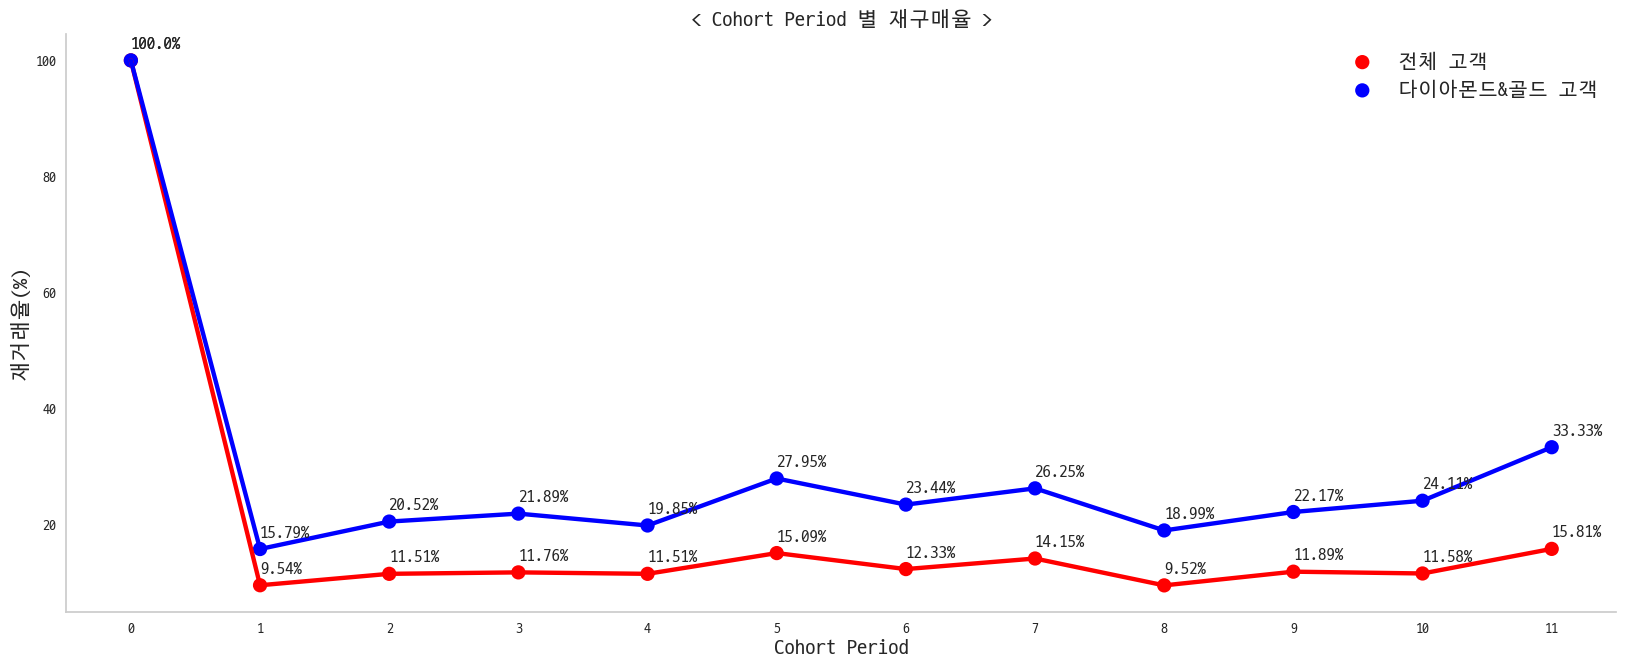

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 예시 데이터프레임 생성 (df_c와 cohort 데이터프레임은 이미 정의되어 있다고 가정)

# 전체 고객 그래프
d_all = df_c.copy()
d_all = pd.merge(d_all, cohort[['FirstOrder', '거래년월', 'CohortPeriod']])
customer_per_month_all = d_all.groupby("FirstOrder")["고객ID"].nunique().values
customers_all = customer_per_month_all.cumsum()
customers_all = customers_all[::-1]
customer_in_month_all = d_all.groupby("CohortPeriod")["고객ID"].nunique()

# 다이아몬드 & 골드 고객 그래프
d_diamond_gold = df_c.copy()
d_diamond_gold = d_diamond_gold.loc[(d_diamond_gold['고객분류']=='다이아몬드')|(d_diamond_gold['고객분류']=='골드')]
d_diamond_gold = pd.merge(d_diamond_gold, cohort[['FirstOrder', '거래년월', 'CohortPeriod']])
customer_per_month_diamond_gold = d_diamond_gold.groupby("FirstOrder")["고객ID"].nunique().values
customers_diamond_gold = customer_per_month_diamond_gold.cumsum()
customers_diamond_gold = customers_diamond_gold[::-1]
customer_in_month_diamond_gold = d_diamond_gold.groupby("CohortPeriod")["고객ID"].nunique()

plt.rcParams["axes.facecolor"] = "white"
fig, ax = plt.subplots(figsize=(20, 7.5))
ax.grid(False)

# 전체 고객 그래프
x_all = customer_in_month_all.index
y_all = 100 * (customer_in_month_all / customers_all)
sns.pointplot(x=x_all, y=y_all, color='red', label='전체 고객')

# 다이아몬드 & 골드 고객 그래프
x_diamond_gold = customer_in_month_diamond_gold.index
y_diamond_gold = 100 * (customer_in_month_diamond_gold / customers_diamond_gold)
sns.pointplot(x=x_diamond_gold, y=y_diamond_gold, color='blue', label='다이아몬드&골드 고객')

# 각 그래프의 범례 추가
ax.legend(loc='upper right', fontsize='large')

for x, y in zip(x_all, y_all):
    plt.text(x, y + 2, s=str(round(y, 2)) + "%")
    
for x, y in zip(x_diamond_gold, y_diamond_gold):
    plt.text(x, y + 2, s=str(round(y, 2)) + "%")

ax.set_title('< Cohort Period 별 재구매율 >', fontsize=15)
plt.xlabel("Cohort Period", fontsize=15)
plt.ylabel("재거래율(%)", fontsize=15)
sns.despine()
plt.show()


> 다이아몬드, 골드 고객 재거래율이 전체 고객에 비해 두배 가까이 높음
<br><br> 최초 거래 1개월 뒤 재거래율이 전반적으로 낮음

## Cohort 분석 최종결론

<br>
1) 전체 고객<br><br>
- 최초 거래 1개월 뒤 재거래율이 낮다.<br><br>
- 최초 거래가 9월, 10월인 고객들의 재거래율이 낮다.<br>
<br>
<br>
2) 우수 고객 (다이아몬드&골드)<br><br>
- 최초 거래 1개월 뒤 재거래율이 약간 낮다.<br><br>
- 최초 거래가 10월인 고객들의 재거래율이 낮다.<br><br>
- 다른 고객들에 비하여 재거래율이 2배 가까이 높다.
<br>
<br>
<br>
3) 최종결론 <br><br>
- 1) 전체고객, 우수고객 모두 1개월 내 재거래율이 낮다.<br><br>
- 2) 전체고객, 우수고객 모두 최초 구매가 10월인 경우 재거래율이 낮다. <br><br>
<br>
<br>
4) Solution <br><br>
-  1) 최초 거래 1개월 후 재거래 유도<br><br>
>>>> 해당년도 최초 거래 후 1개월 내 거래시 혜택을 부여하는 방식으로 거래 유도 <br><br>
-  2) 9월, 10월 최초 거래 고객 이탈 방지 <br><br>
>>>> 10월, 11월, 12월은 매출이 최대화 되는 기간임. <br><br> 
>>>> 9월, 10월 최초 거래 고객에게 혜택을 부여하여 연말 거래 유도

===========================================================================================

# 7. 아래 EDA 파트는 그냥 참고용

## EDA

#### 월별 총거래금액 추이 (배송비 포함)

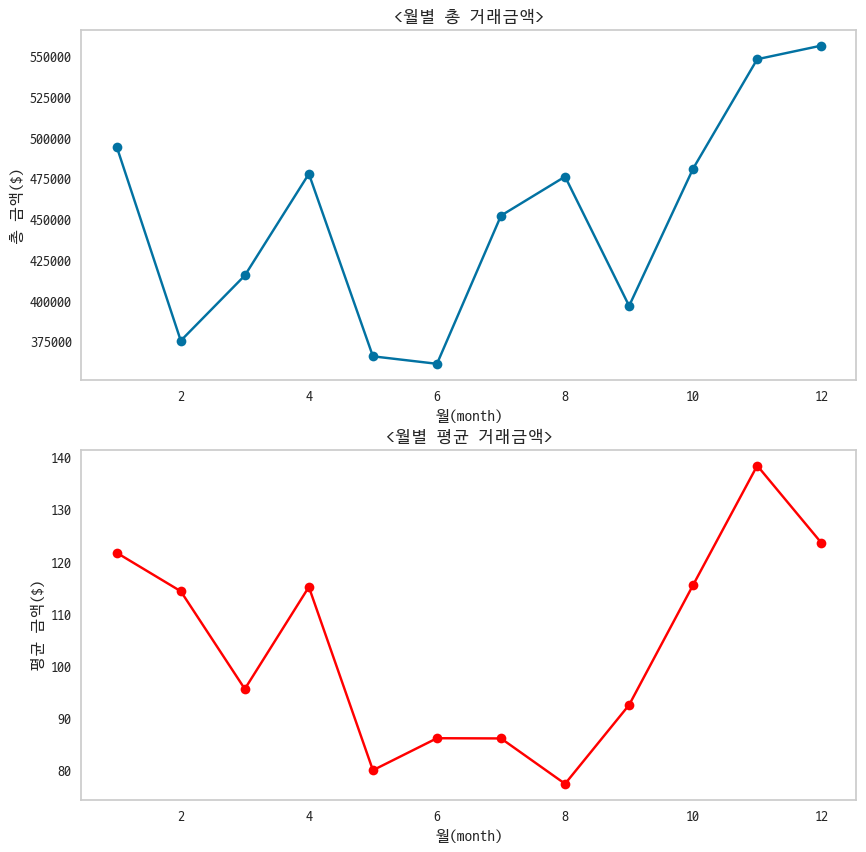

In [80]:
monthly_expenditure_sum = joined_df.groupby('월')['총결제금액(배송비포함)'].sum()
monthly_expenditure_mean = joined_df.groupby('월')['총결제금액(배송비포함)'].mean()


plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_expenditure_sum, marker='o');
plt.title('<월별 총 거래금액>');
plt.ylabel('총 금액($)');
plt.xlabel('월(month)');
plt.grid();

plt.subplot(2,1,2)
plt.plot(monthly_expenditure_mean, marker='o', color='red');
plt.title('<월별 평균 거래금액>');
plt.ylabel('평균 금액($)');
plt.xlabel('월(month)');
plt.grid();

#### 월별 거래 수량 추이

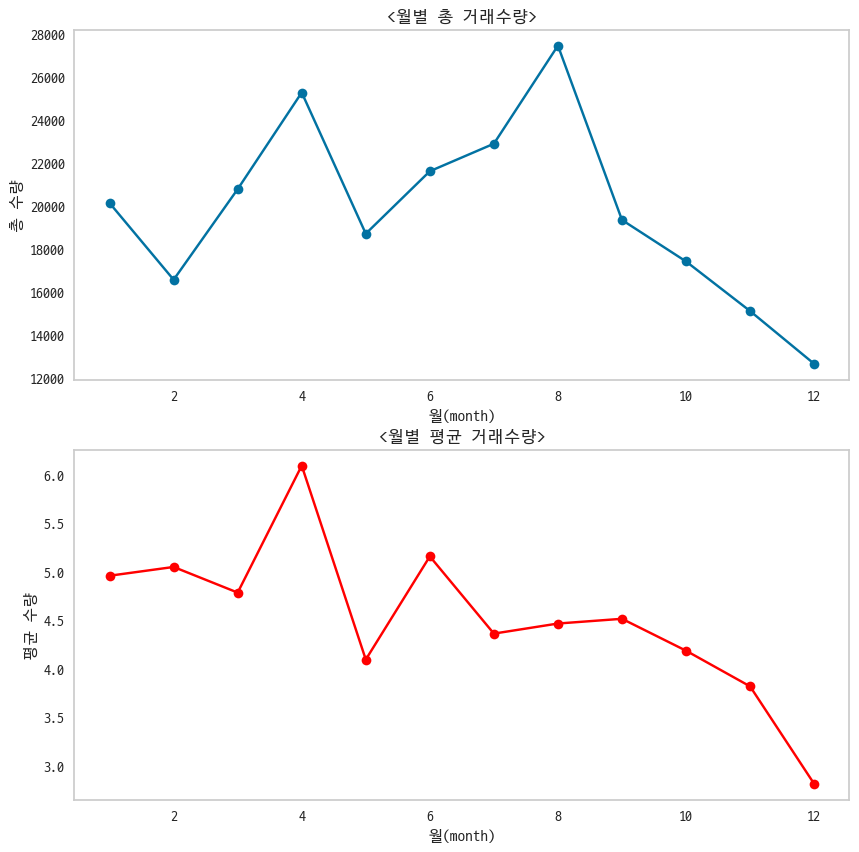

In [81]:
monthly_volume_sum = joined_df.groupby('월')['수량'].sum()
monthly_volume_mean = joined_df.groupby('월')['수량'].mean()


plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_volume_sum, marker='o');
plt.title('<월별 총 거래수량>');
plt.ylabel('총 수량');
plt.xlabel('월(month)');
plt.grid();

plt.subplot(2,1,2)
plt.plot(monthly_volume_mean, marker='o', color='red');
plt.title('<월별 평균 거래수량>');
plt.ylabel('평균 수량');
plt.xlabel('월(month)');
plt.grid();

#### 8월에 많이 팔린 제품 카테고리

In [82]:
august = joined_df[joined_df['월'] == 8]
august['제품카테고리'].value_counts()

제품카테고리
Apparel                 2820
Nest-USA                1088
Office                   541
Drinkware                462
Lifestyle                429
Bags                     201
Notebooks & Journals     191
Headgear                 112
Nest                      86
Waze                      62
Bottles                   38
Housewares                33
Nest-Canada               24
Fun                       21
Backpacks                 11
Gift Cards                10
Accessories                8
Android                    7
Google                     6
Name: count, dtype: int64

#### 4월에 많이 팔린 제품 카테고리

In [83]:
april = df[df['월'] == 4]
april['제품카테고리'].value_counts()

제품카테고리
Apparel                 1582
Nest-USA                 996
Office                   606
Drinkware                267
Lifestyle                252
Bags                     145
Notebooks & Journals      73
Headgear                  72
Waze                      35
Nest-Canada               27
Bottles                   20
Fun                       18
More Bags                 13
Backpacks                 11
Housewares                10
Google                    10
Gift Cards                 7
Accessories                4
Android                    2
Name: count, dtype: int64

#### 12월에 많이 팔린 제품 카테고리

In [84]:
december = df[df['월'] == 12]
december['제품카테고리'].value_counts()

제품카테고리
Nest-USA                1534
Apparel                 1337
Nest                     712
Office                   385
Drinkware                160
Bags                      89
Lifestyle                 71
Waze                      64
Accessories               56
Headgear                  49
Nest-Canada               26
Gift Cards                10
Notebooks & Journals       9
Name: count, dtype: int64

#### 제품 카테고리별 가격대(배송비 포함)

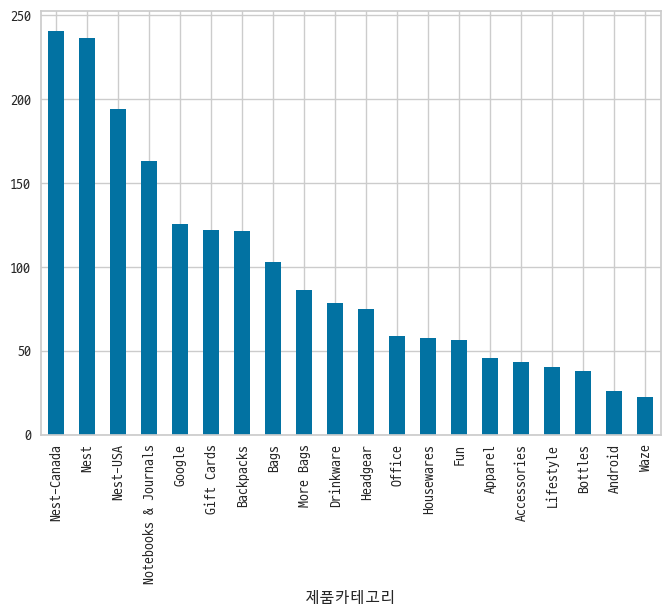

In [85]:
price_category = df.groupby('제품카테고리')['총결제금액(배송비포함)'].mean().sort_values(ascending=False)
price_category.plot(kind='bar');

### 분석
거래금액 그래프와 거래수량 그래프를 비교해보면, 
1. **4월과 8월에 높은 거래량을 기록한다.**
    - 하지만 8월의 경우 평균 거래금액은 가장 낮게 형성되는 걸로 봐선, Apparel과 같은 낮은 가격대의 제품들이 많이 소비됨을 알 수 있다.

2. **12월에는 가장 높은 거래금액이 기록되어있지만, 거래량은 가장 낮게 나타난다.**
    - 가격이 비싼 제품(Nest, Nest-usa)이 많이 소비됨을 알 수 있음
    

### 마케팅비용과 거래금액/거래량의 상관관계?

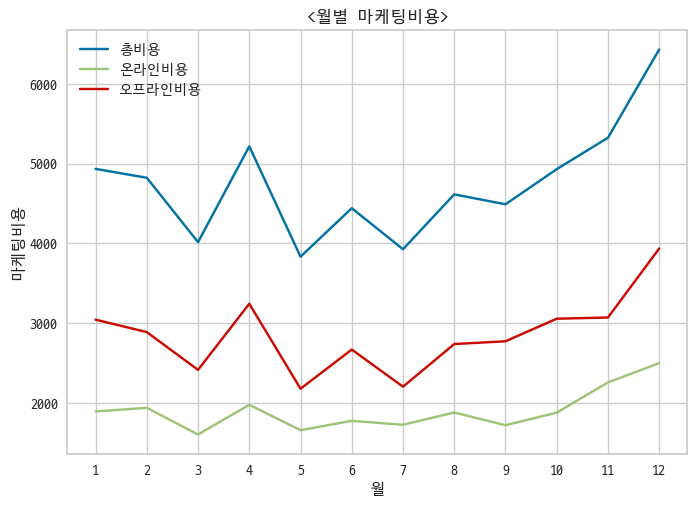

In [86]:
df['총비용'] = df['온라인비용'] + df['오프라인비용']
online_marketing = df.groupby(df['월'])['온라인비용'].mean()
offline_marketing = df.groupby(df['월'])['오프라인비용'].mean()
total_marketing = df.groupby(df['월'])['총비용'].mean()

total_marketing.plot.line(x='월', y='총비용')
online_marketing.plot.line(x='월', y='온라인비용')
offline_marketing.plot.line(x='월', y='오프라인비용')
plt.legend()
plt.title('<월별 마케팅비용>')
plt.ylabel('마케팅비용')
plt.xticks(range(1,13));

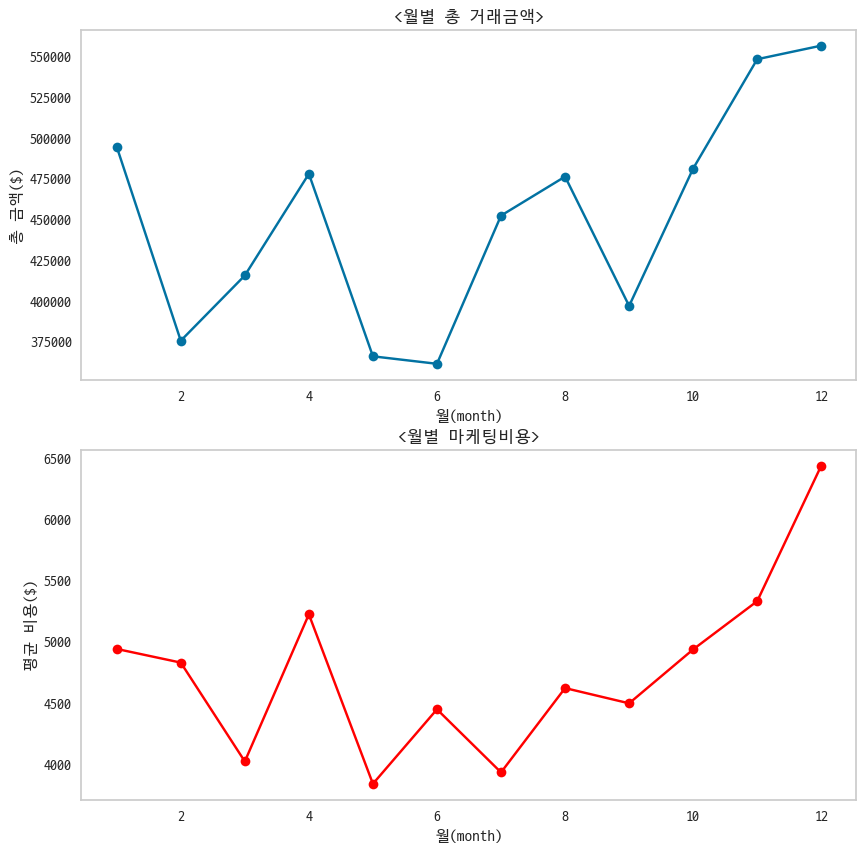

In [87]:
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_expenditure_sum, marker='o');
plt.title('<월별 총 거래금액>');
plt.ylabel('총 금액($)');
plt.xlabel('월(month)');
plt.grid();

plt.subplot(2,1,2)
plt.plot(total_marketing, marker='o', color='red');
plt.title('<월별 마케팅비용>');
plt.ylabel('평균 비용($)');
plt.xlabel('월(month)');
plt.grid();

### 분석
- 마케팅비용 그래프와 월별 총거래금액 그래프가 유사한 모양을 보인다. 